In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
#helps visualizing whole dataset
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
pd.options.display.max_colwidth = 250

In [13]:
#Read dataset from file
dados = pd.read_csv('pokemon.csv')

#select only the available pokemons
dados = dados[(dados['type1'] == 'water') | (dados['type1'] == 'normal')]
dados

abilities  \
6                                                    ['Torrent', 'Rain Dish']   
7                                                    ['Torrent', 'Rain Dish']   
8                                                    ['Torrent', 'Rain Dish']   
15                                  ['Keen Eye', 'Tangled Feet', 'Big Pecks']   
16                                  ['Keen Eye', 'Tangled Feet', 'Big Pecks']   
17                                  ['Keen Eye', 'Tangled Feet', 'Big Pecks']   
18          ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']   
19          ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']   
20                                                     ['Keen Eye', 'Sniper']   
21                                                     ['Keen Eye', 'Sniper']   
38                              ['Cute Charm', 'Competitive', 'Friend Guard']   
39                                     ['Cute Charm', 'Competitive', 'Frisk']   
51     ['Pickup', 'Technician', 'Unnerve', 'Pickup', 'Technician', 'Rattled']   
52   ['Limber', 'Technician', 'Unnerve', 'Fur Coat', 'Technician', 'Rattled']   
53                                       ['Damp', 'Cloud Nine', 'Swift Swim']   
54                                       ['Damp', 'Cloud Nine', 'Swift Swim']   
59                                     ['Water Absorb', 'Damp', 'Swift Swim']   
60                                     ['Water Absorb', 'Damp', 'Swift Swim']   
61                                     ['Water Absorb', 'Damp', 'Swift Swim']   
71                                 ['Clear Body', 'Liquid Ooze', 'Rain Dish']   
72                                 ['Clear Body', 'Liquid Ooze', 'Rain Dish']   
78                                  ['Oblivious', 'Own Tempo', 'Regenerator']   
79                                  ['Oblivious', 'Own Tempo', 'Regenerator']   
82                                     ['Keen Eye', 'Inner Focus', 'Defiant']   
83                                 ['Run Away', 'Early Bird', 'Tangled Feet']   
84                                 ['Run Away', 'Early Bird', 'Tangled Feet']   
85                                     ['Thick Fat', 'Hydration', 'Ice Body']   
86                                     ['Thick Fat', 'Hydration', 'Ice Body']   
89                                  ['Shell Armor', 'Skill Link', 'Overcoat']   
90                                  ['Shell Armor', 'Skill Link', 'Overcoat']   
97                             ['Hyper Cutter', 'Shell Armor', 'Sheer Force']   
98                             ['Hyper Cutter', 'Shell Armor', 'Sheer Force']   
107                                  ['Own Tempo', 'Oblivious', 'Cloud Nine']   
112                                ['Natural Cure', 'Serene Grace', 'Healer']   
114                                  ['Early Bird', 'Scrappy', 'Inner Focus']   
115                                          ['Swift Swim', 'Sniper', 'Damp']   
116                                        ['Poison Point', 'Sniper', 'Damp']   
117                              ['Swift Swim', 'Water Veil', 'Lightningrod']   
118                              ['Swift Swim', 'Water Veil', 'Lightningrod']   
119                                ['Illuminate', 'Natural Cure', 'Analytic']   
120                                ['Illuminate', 'Natural Cure', 'Analytic']   
127                              ['Intimidate', 'Anger Point', 'Sheer Force']   
128                                                 ['Swift Swim', 'Rattled']   
129                                                   ['Intimidate', 'Moxie']   
130                              ['Water Absorb', 'Shell Armor', 'Hydration']   
131                                                    ['Limber', 'Imposter']   
132                              ['Run Away', 'Adaptability', 'Anticipation']   
133                                             ['Water Absorb', 'Hydration']   
136                                         ['Trace', 'Download', 'Analytic']   
142               

In [14]:
#select useful columns
dados = dados.drop(columns=['classfication','type2','abilities','against_bug','against_dark','against_dragon',
                            'against_fairy','against_fight','against_fire','against_flying','against_ghost',
                            'against_grass','against_ground','against_ice','against_normal','against_poison',
                            'against_psychic','against_rock','against_steel','against_water','japanese_name',
                            'name','percentage_male','generation','base_happiness','pokedex_number'])
dados

against_electric  attack  base_egg_steps  base_total capture_rate  \
6                 2.0      48            5120         314           45   
7                 2.0      63            5120         405           45   
8                 2.0     103            5120         630           45   
15                2.0      45            3840         251          255   
16                2.0      60            3840         349          120   
17                2.0      80            3840         579           45   
18                1.0      56            3840         253          255   
19                1.0      71            3840         413          127   
20                2.0      60            3840         262          255   
21                2.0      90            3840         442           90   
38                1.0      45            2560         270          170   
39                1.0      70            2560         435           50   
51                1.0      35            5120         290          255   
52                1.0      60            5120         440           90   
53                2.0      52            5120         320          190   
54                2.0      82            5120         500           75   
59                2.0      50            5120         300          255   
60                2.0      65            5120         385          120   
61                2.0      95            5120         510           45   
71                2.0      40            5120         335          190   
72                2.0      70            5120         515           60   
78                2.0      65            5120         315          190   
79                2.0      75            5120         590           75   
82                2.0      90            5120         377           45   
83                2.0      85            5120         310          190   
84                2.0     110            5120         470           45   
85                2.0      45            5120         325          190   
86                2.0      70            5120         475           75   
89                2.0      65            5120         305          190   
90                2.0      95            5120         525           60   
97                2.0     105            5120         325          225   
98                2.0     130            5120         475           60   
107               1.0      55            5120         385           45   
112               1.0       5           10240         450           30   
114               1.0     125            5120         590           45   
115               2.0      40            5120         295          225   
116               2.0      65            5120         440           75   
117               2.0      67            5120         320          225   
118               2.0      92            5120         450           60   
119               2.0      45            5120         340          225   
120               2.0      75            5120         520           60   
127               1.0     100            5120         490           45   
128               2.0      10            1280         200          255   
129               4.0     155            1280         640           45   
130               2.0      85           10240         535           45   
131               1.0      48            5120         288           35   
132               1.0      55            8960         325           45   
133               2.0      65            8960         525           45   
136               1.0      60            5120         395           45   
142               1.0     110           10240         540           25   
157               2.0      65            5120         314           45   
158               2.0      80            5120         405           45   
159               2.0     105            5120         530           45   
160      

In [15]:
#drop rows with NaN values on cells
for i, row in dados.iterrows():
    if np.isnan(dados.at[i,'height_m']) or np.isnan(dados.at[i,'weight_kg']):
        dados = dados.drop([i,i])
        #print(i)
#dados

In [16]:
#copy df changing normal = 1 and water = 0
for i, row in dados.iterrows():
    if dados.at[i,'type1'] == 'normal':
        dados.at[i,'type1'] = 1
    else:
        dados.at[i,'type1'] = 0
#dados

In [17]:
#correct column type
dados['capture_rate'] = dados['capture_rate'].astype(float)
dados['type1'] = dados['type1'].astype(float)
dados['capture_rate'].dtype

dtype('float64')

/usr/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


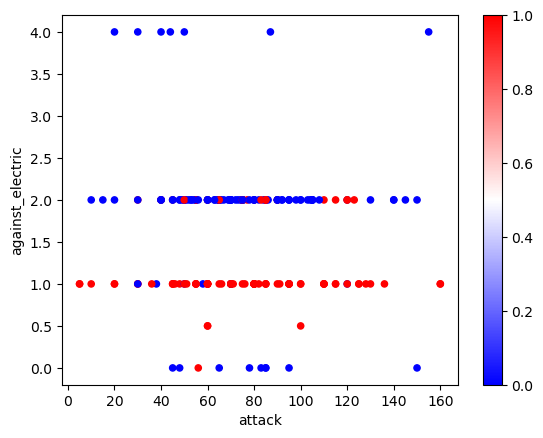

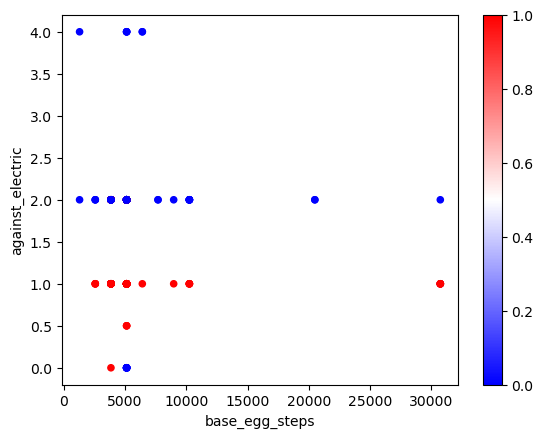

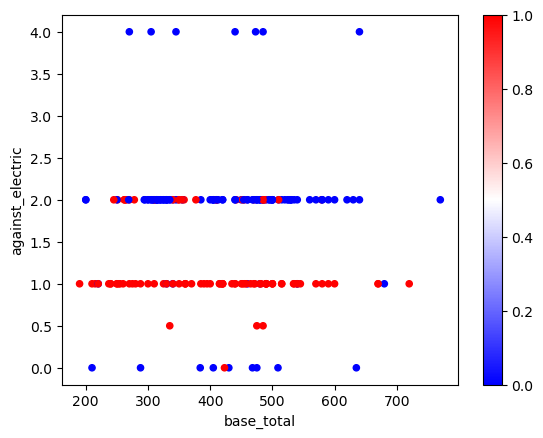

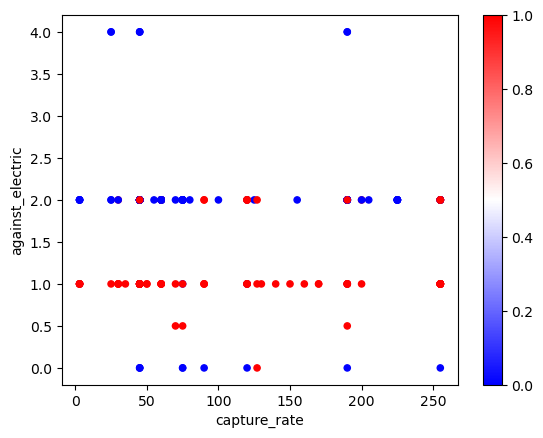

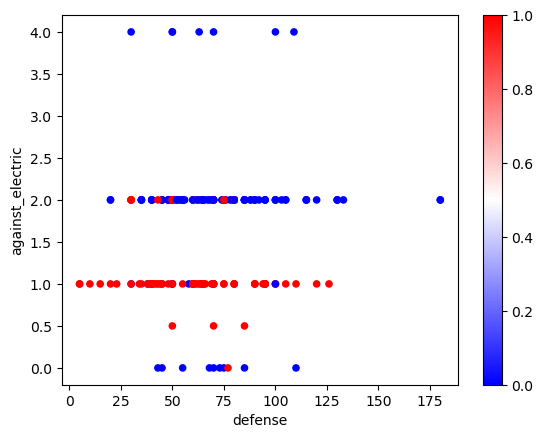

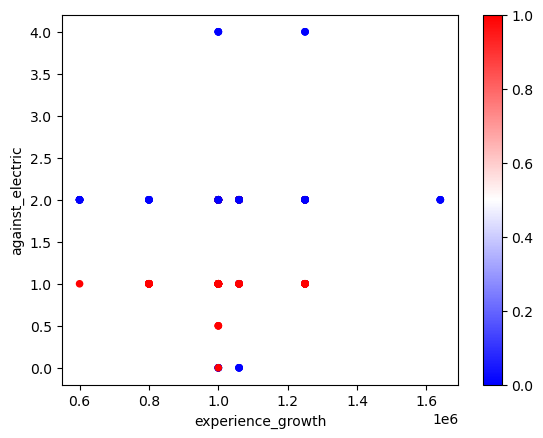

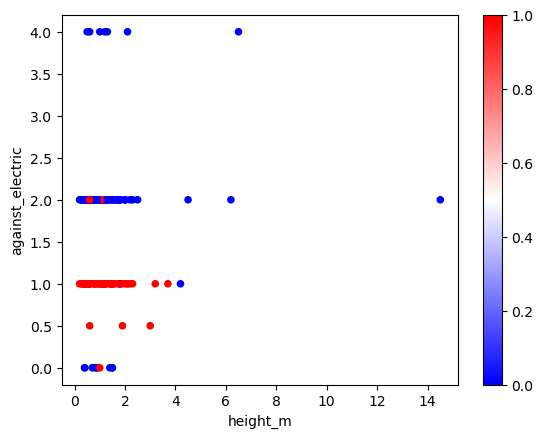

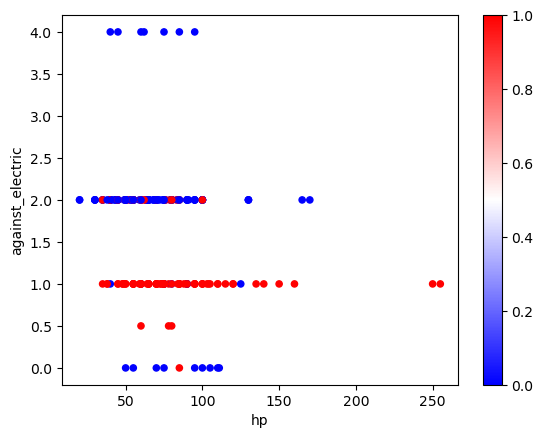

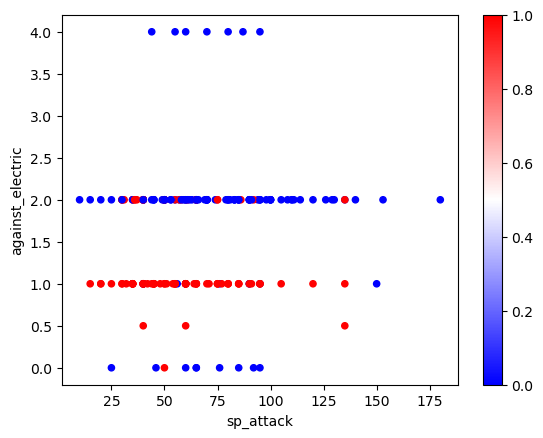

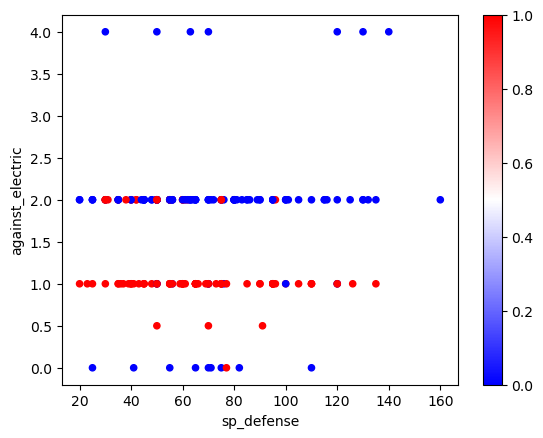

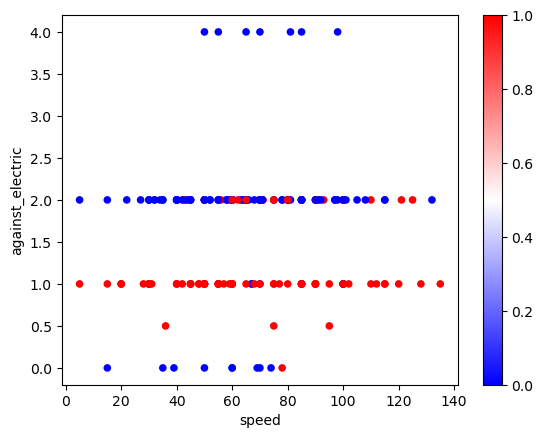

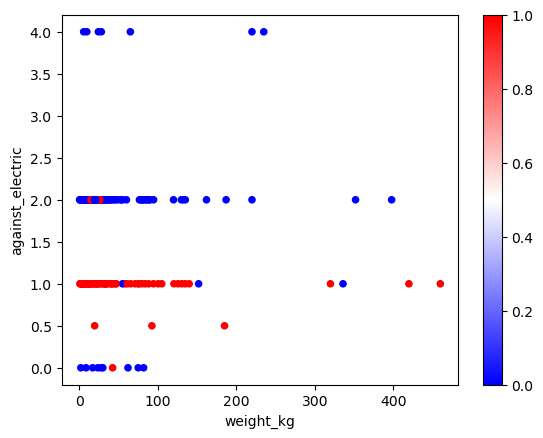

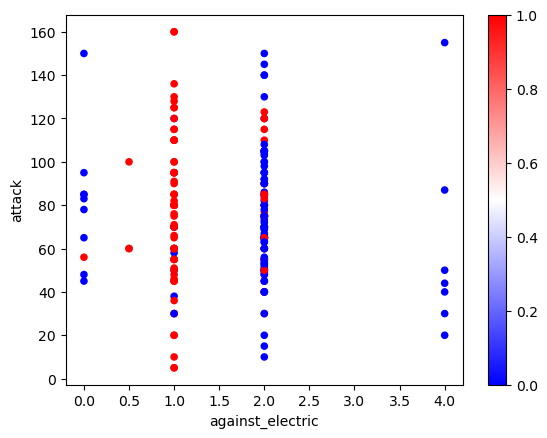

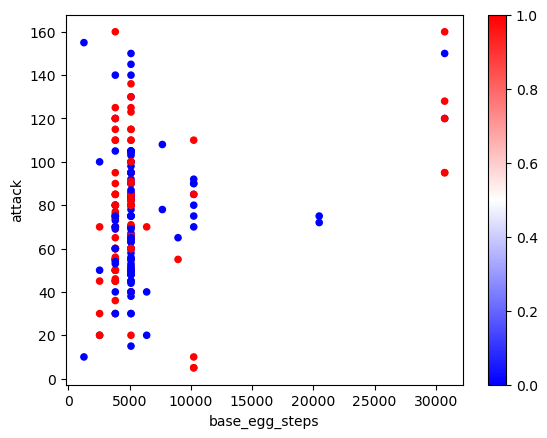

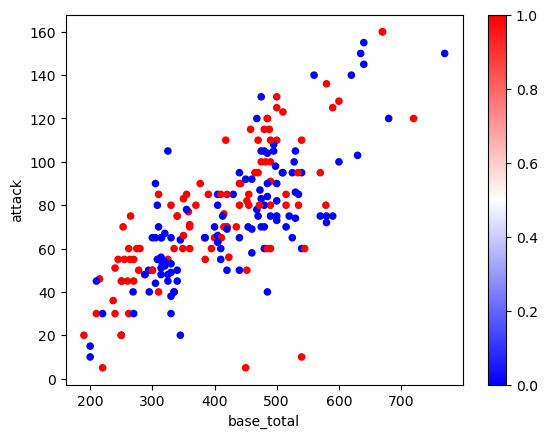

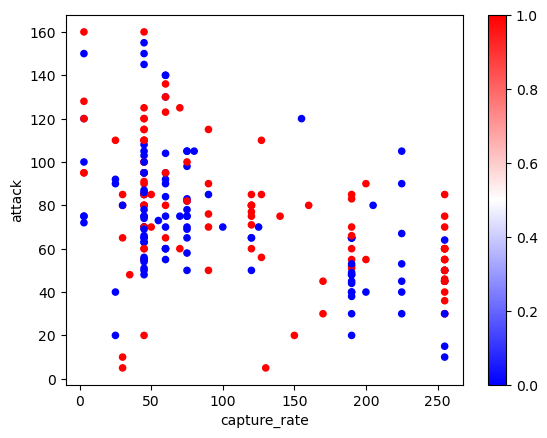

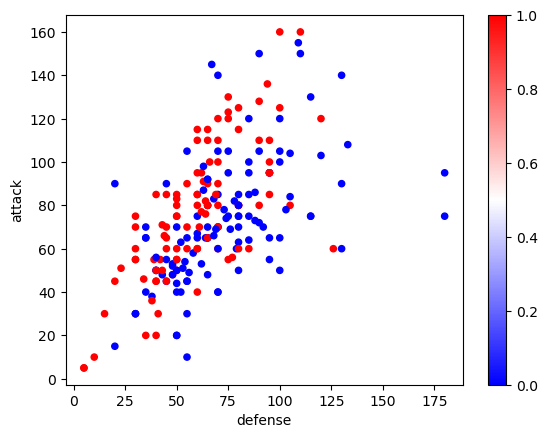

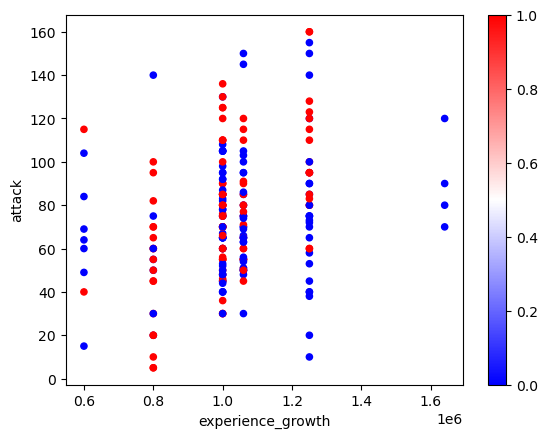

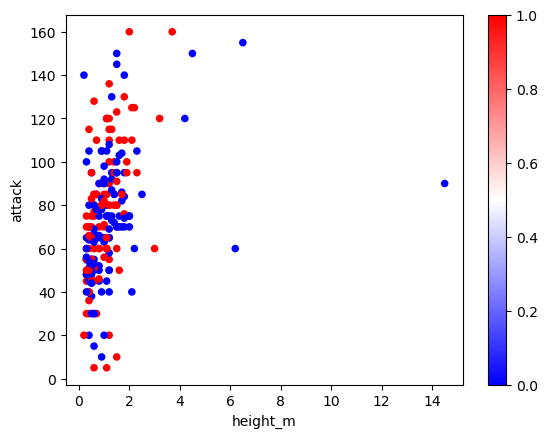

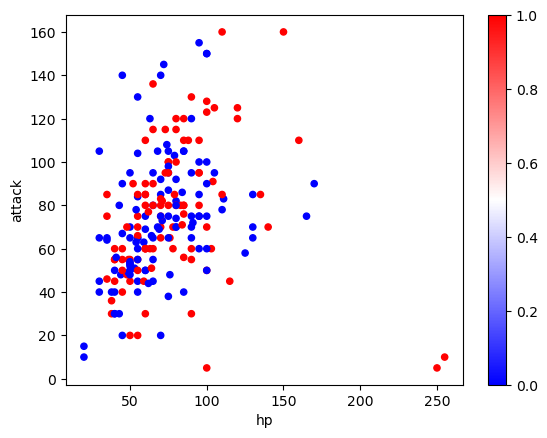

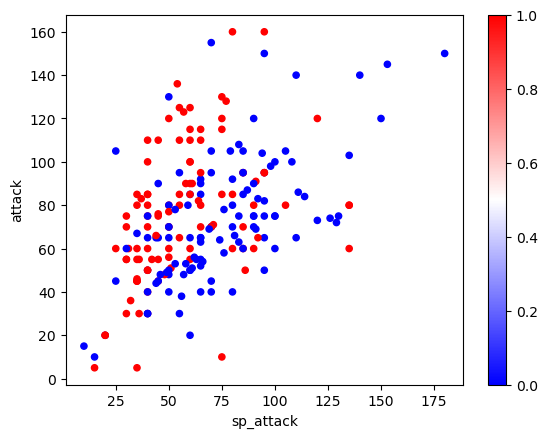

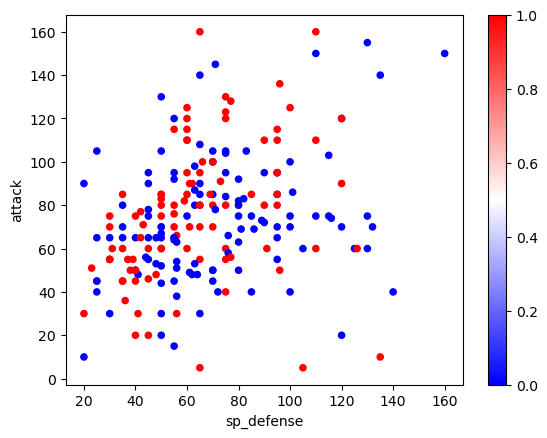

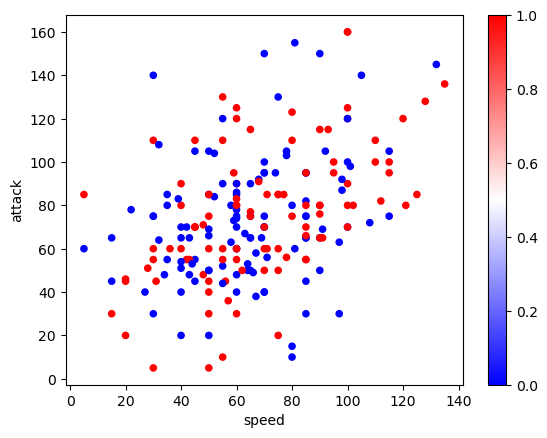

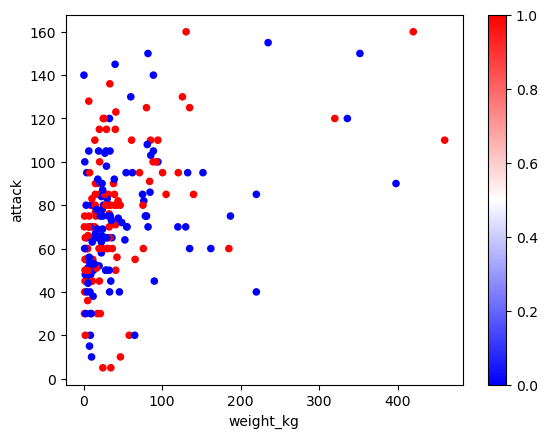

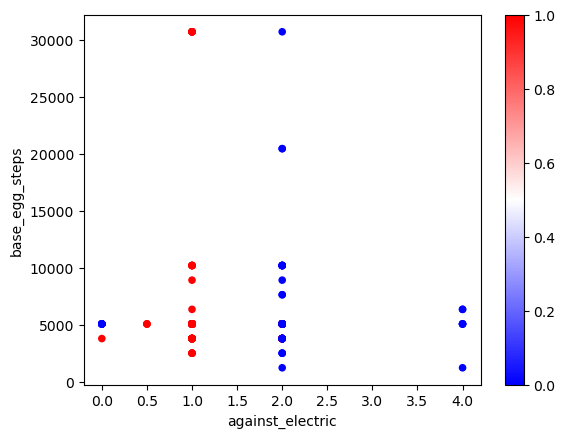

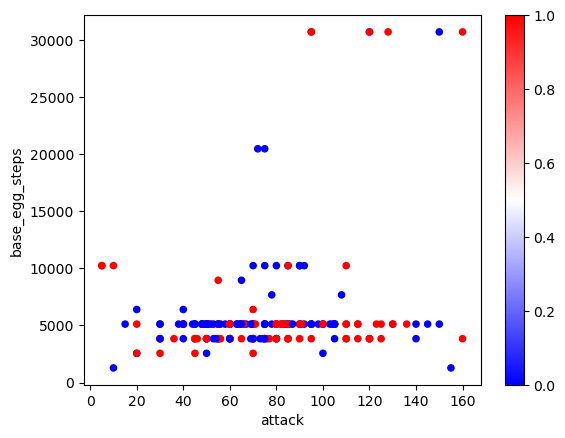

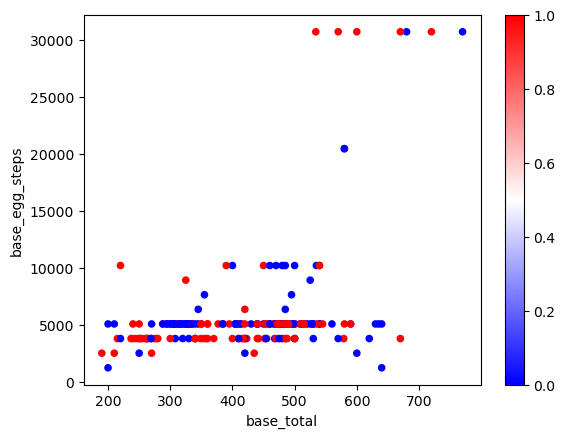

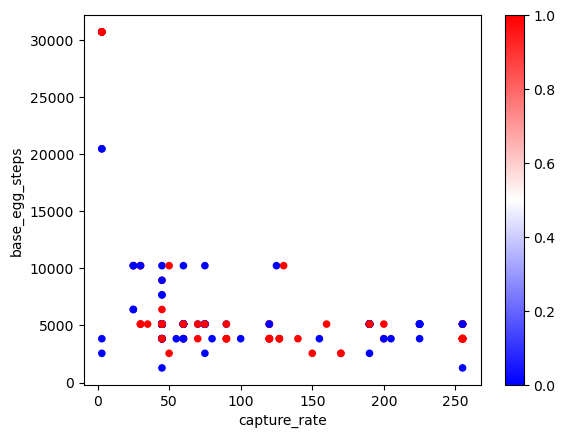

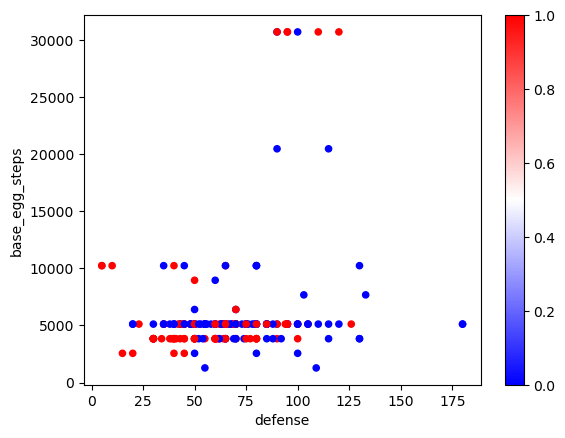

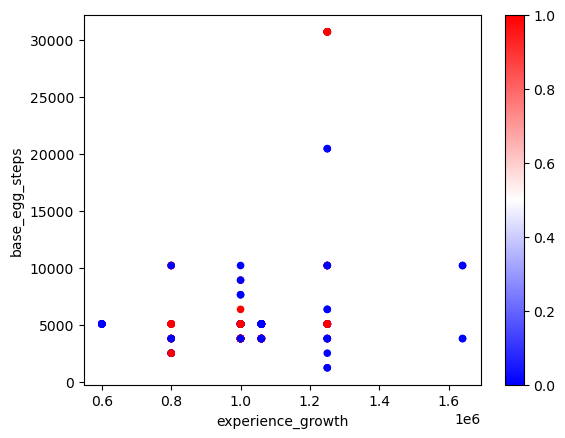

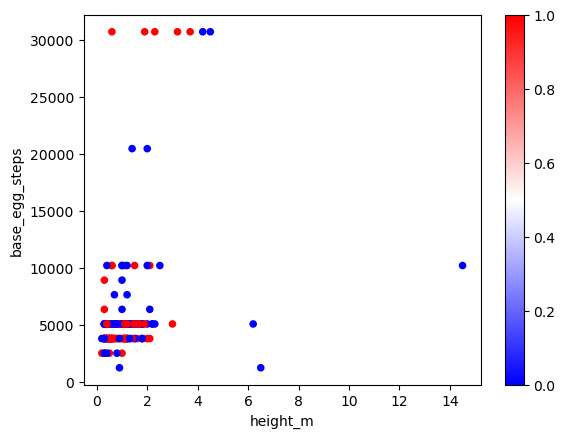

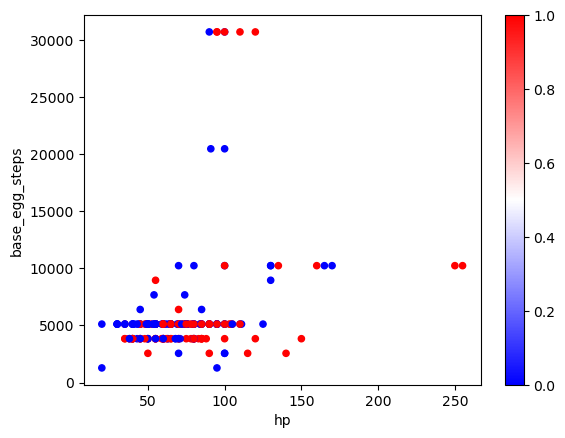

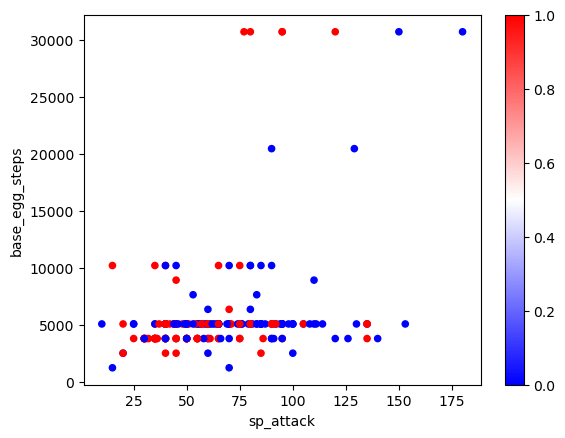

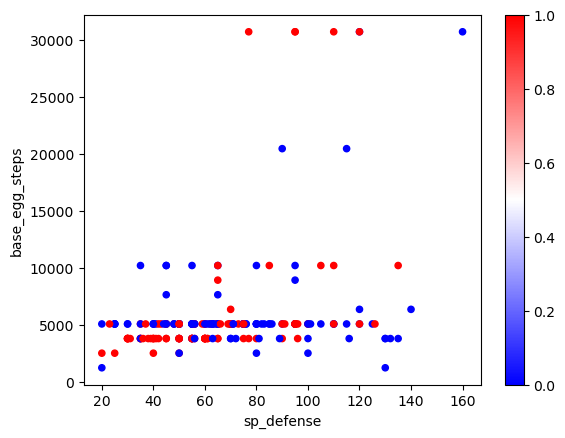

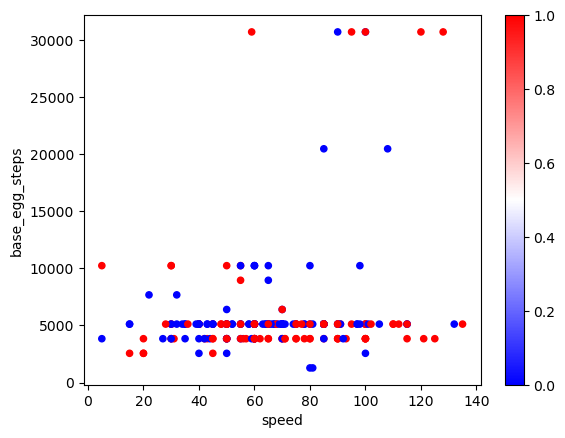

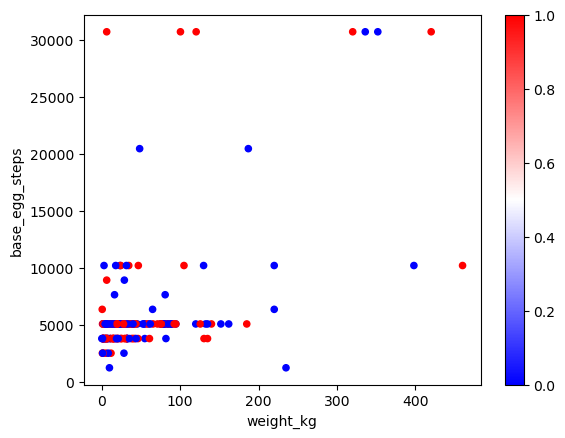

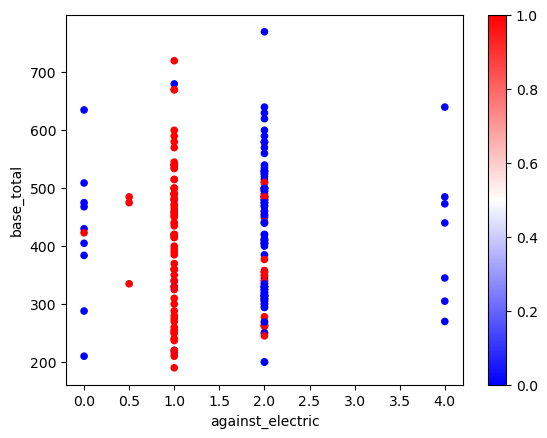

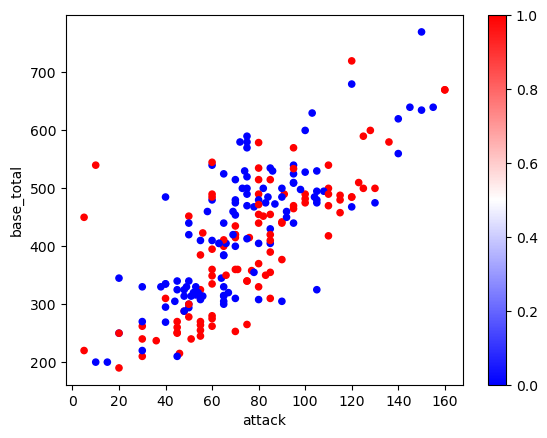

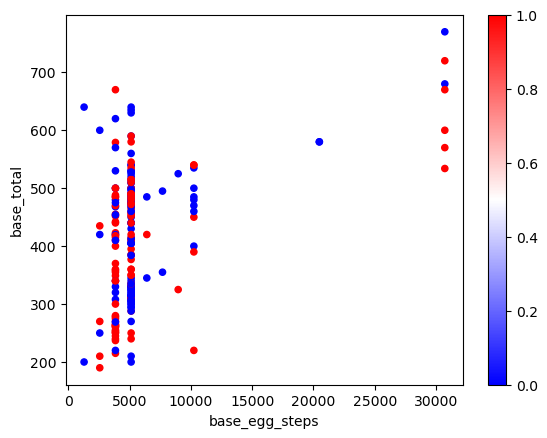

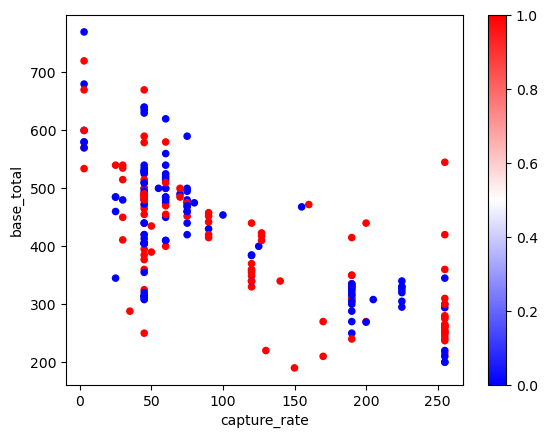

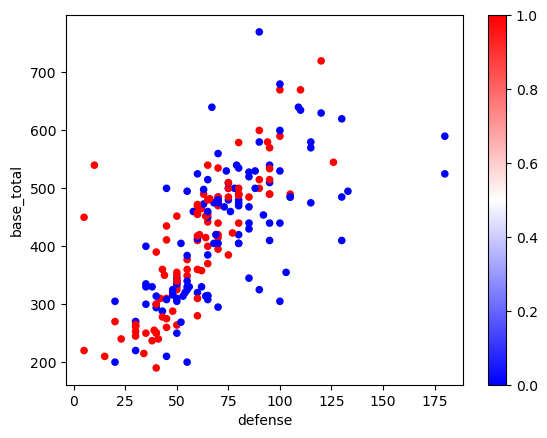

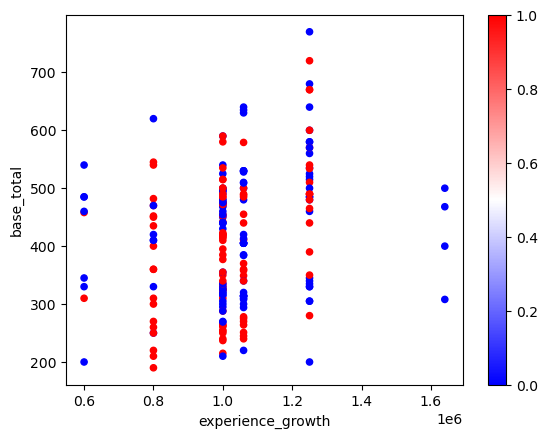

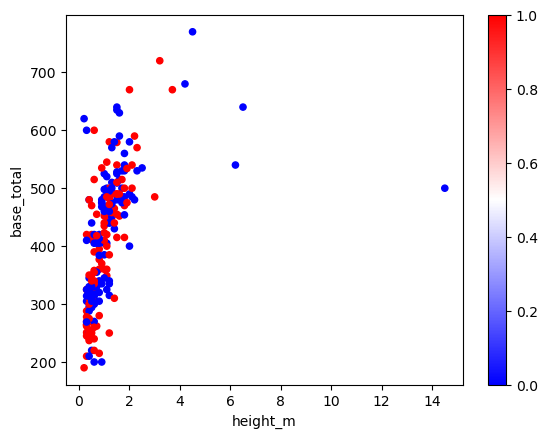

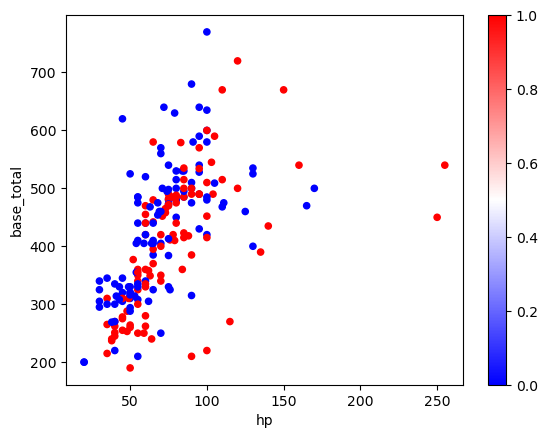

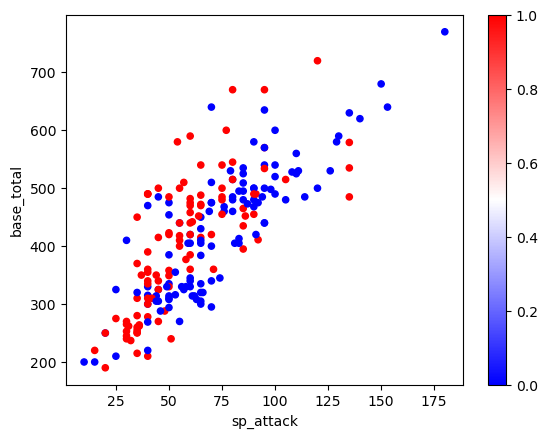

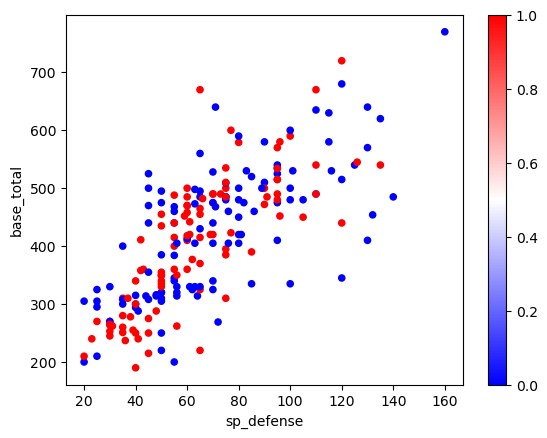

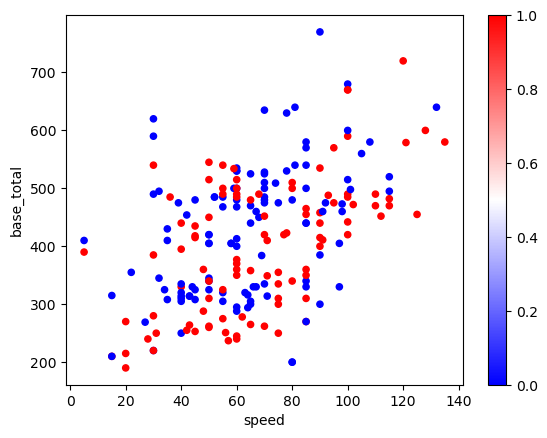

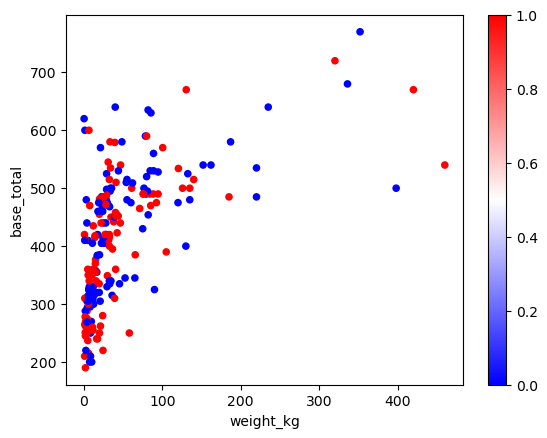

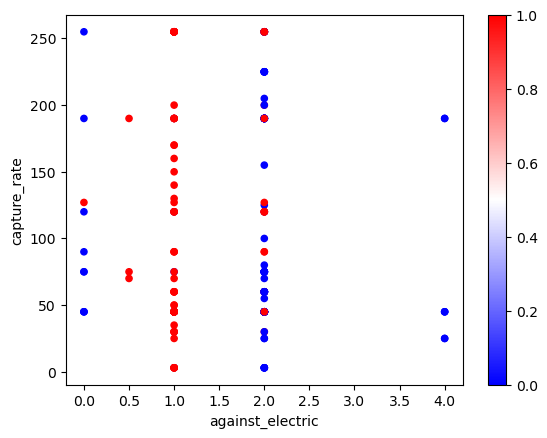

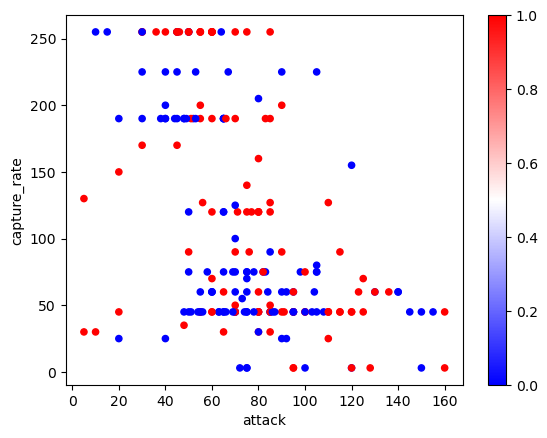

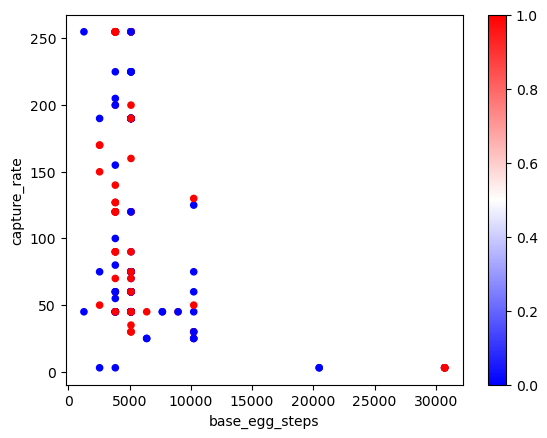

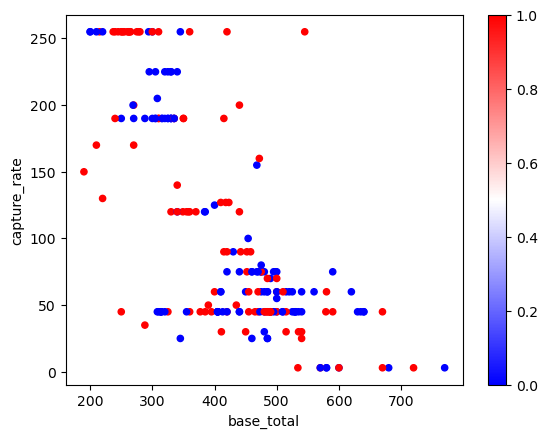

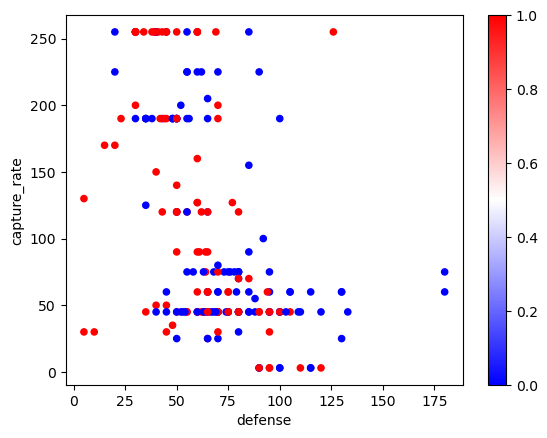

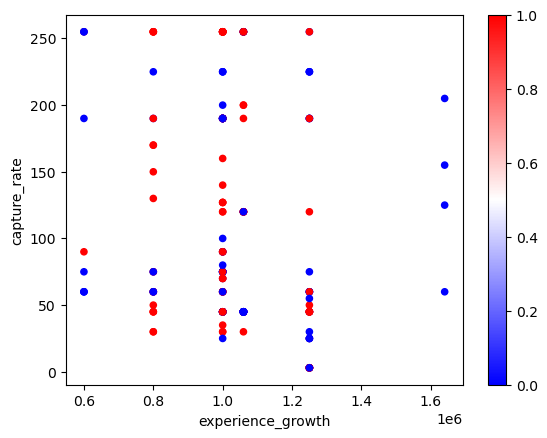

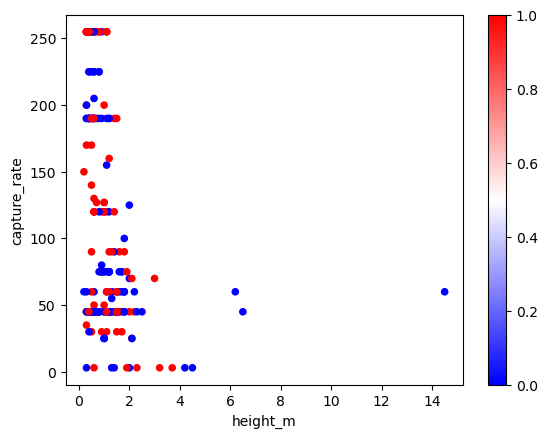

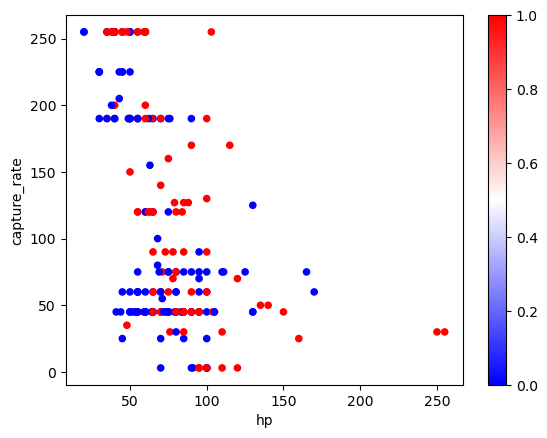

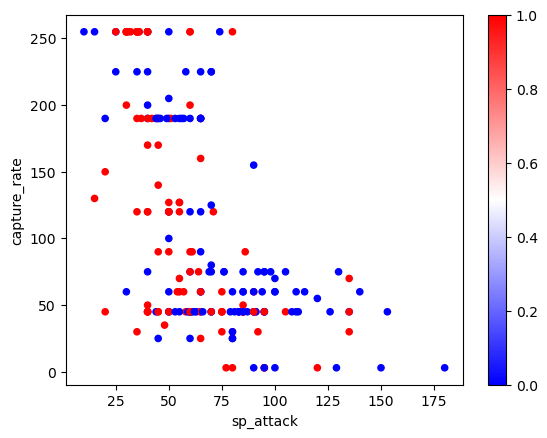

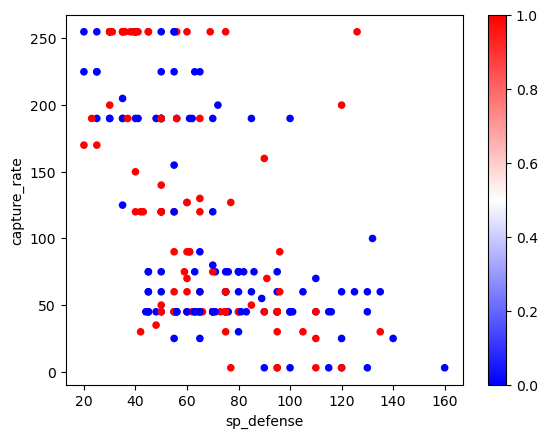

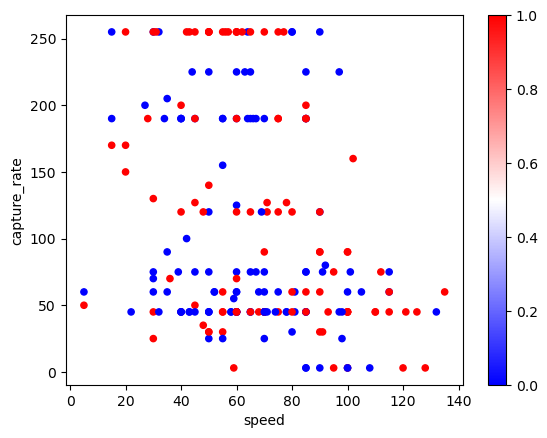

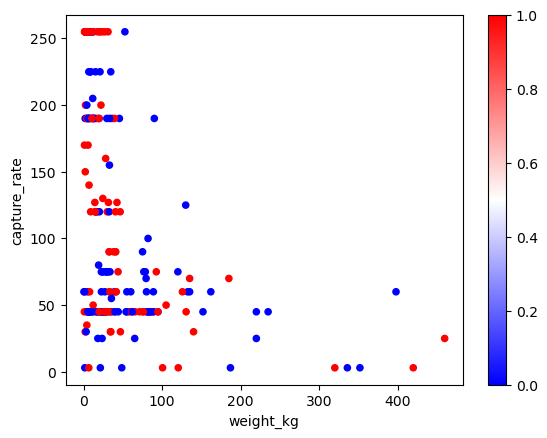

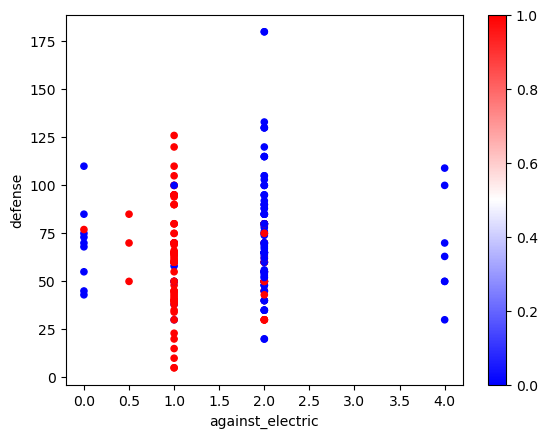

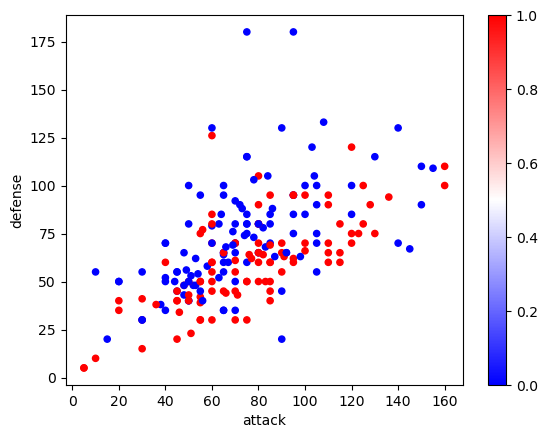

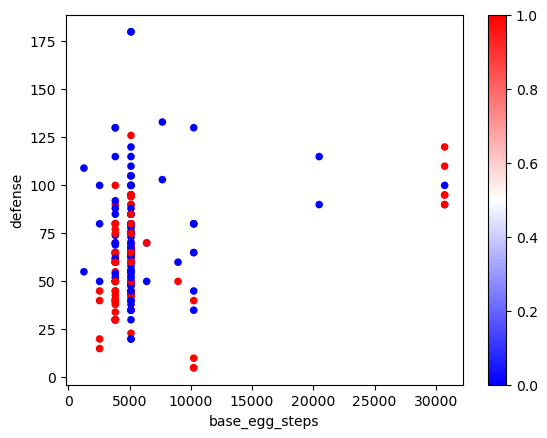

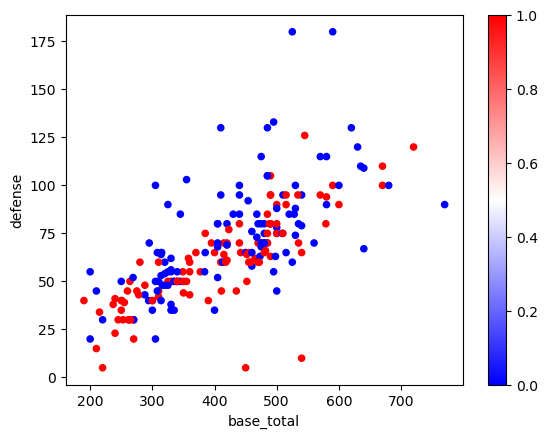

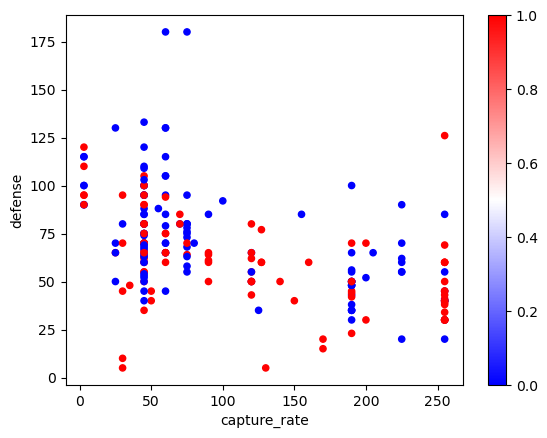

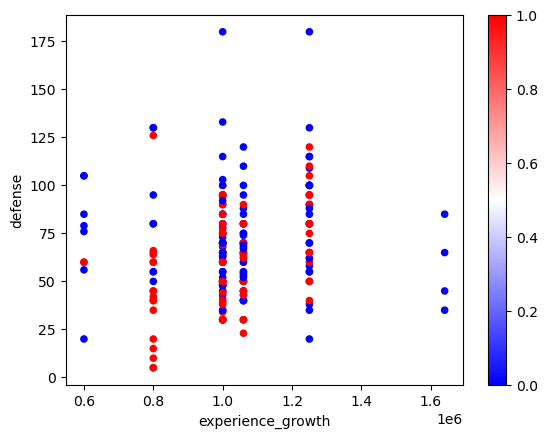

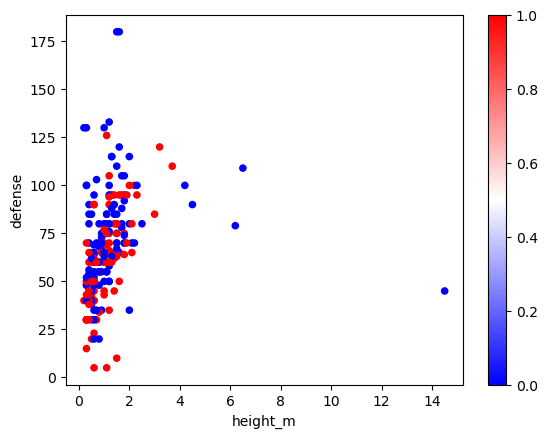

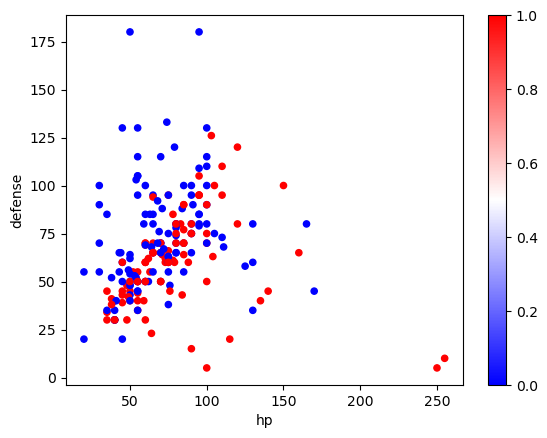

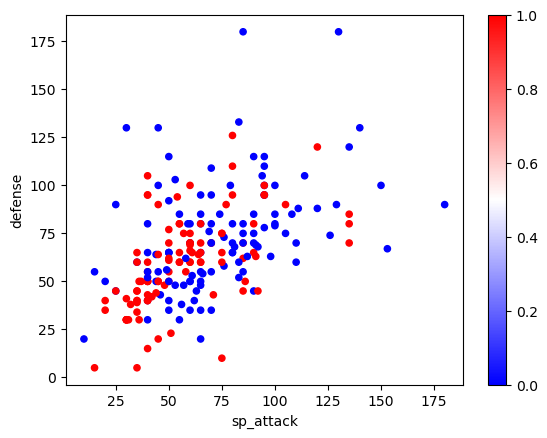

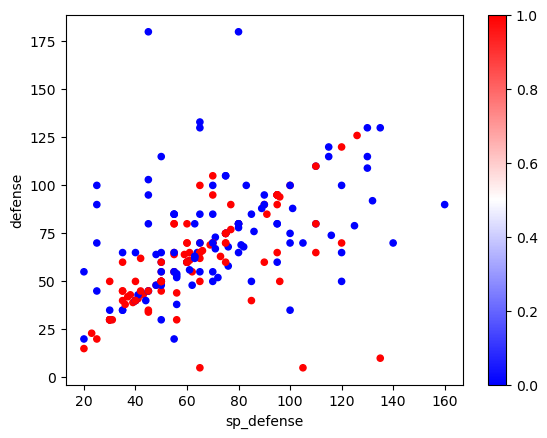

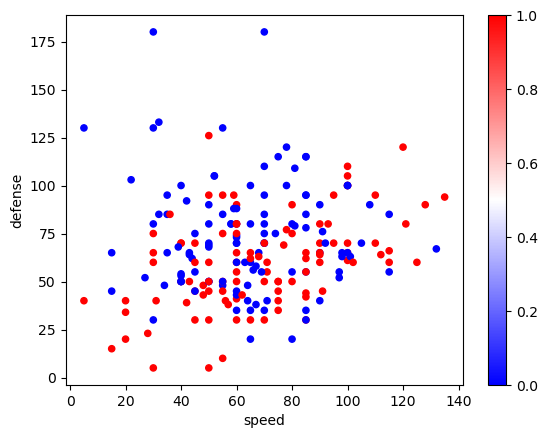

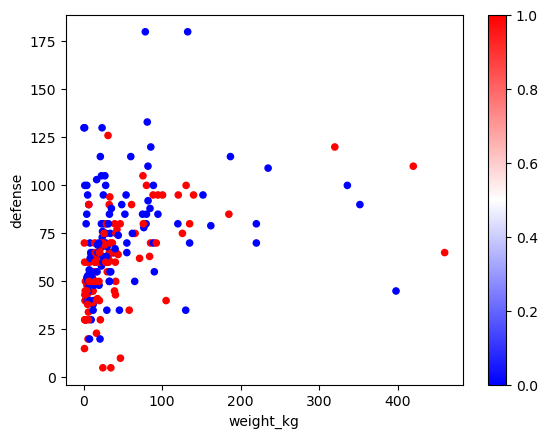

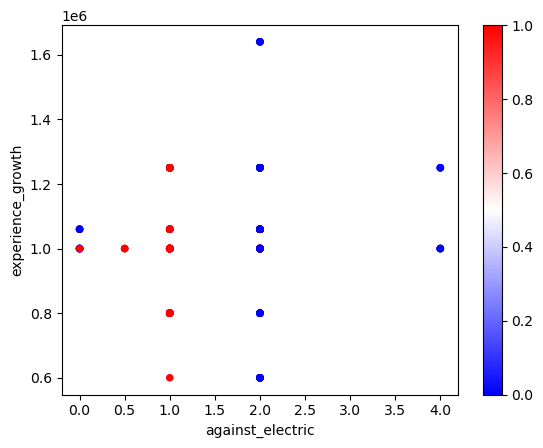

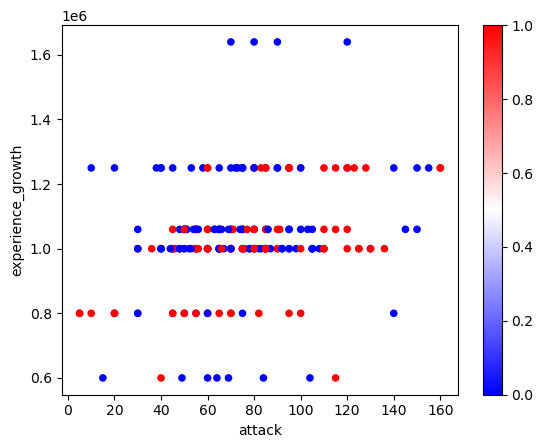

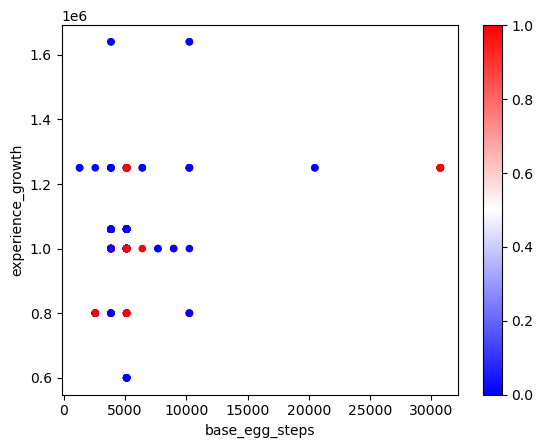

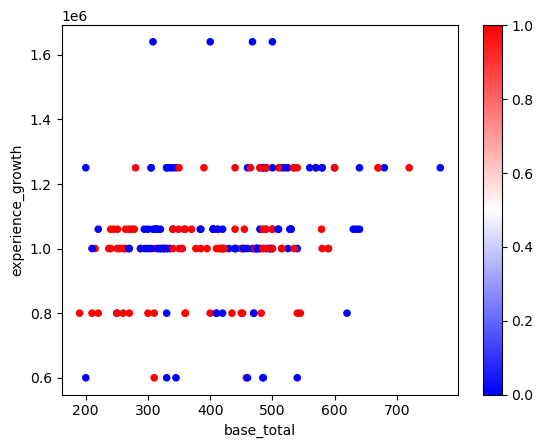

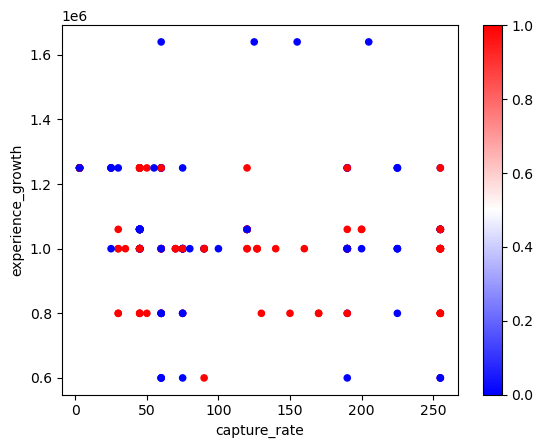

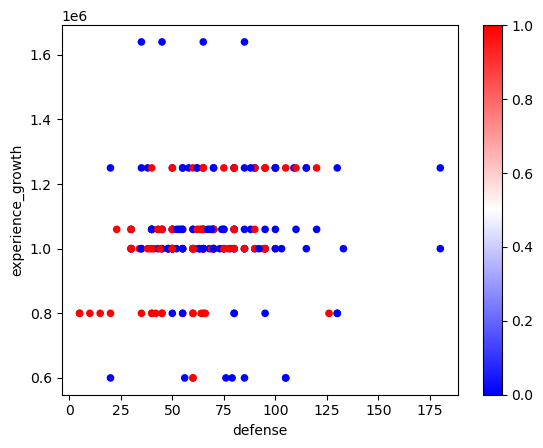

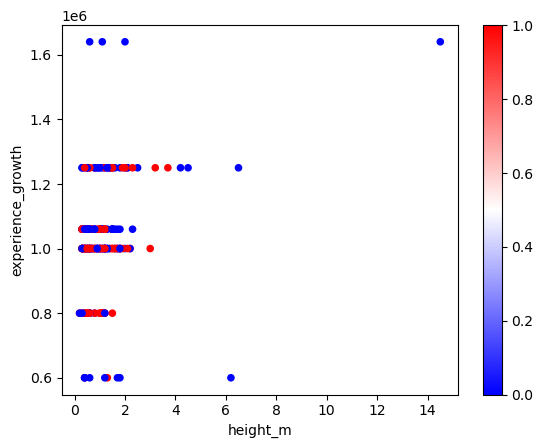

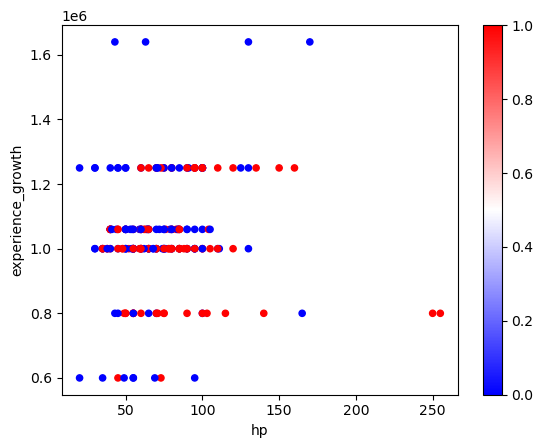

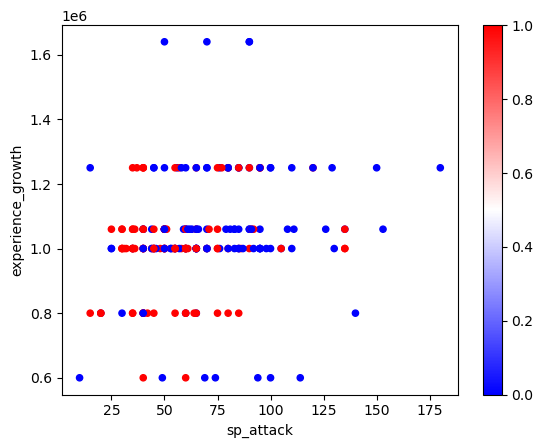

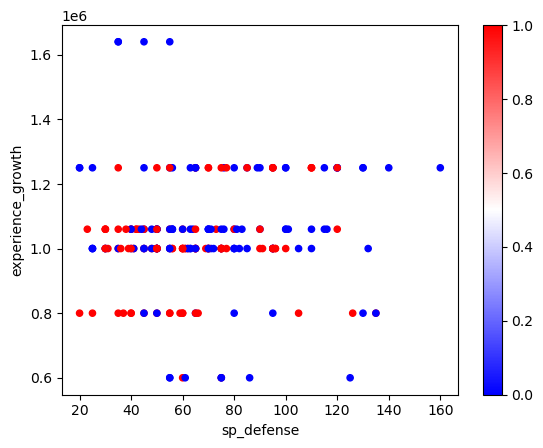

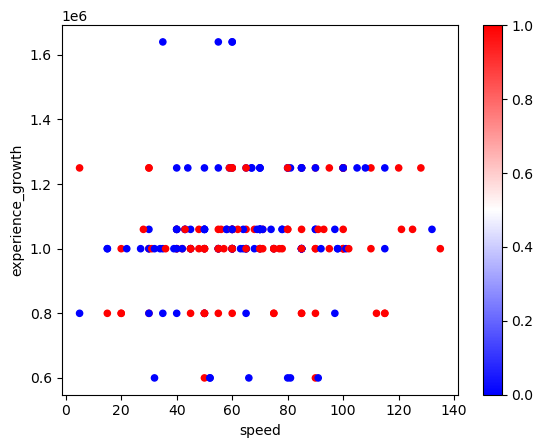

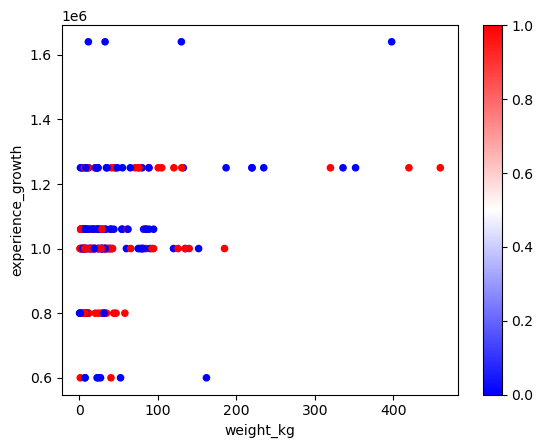

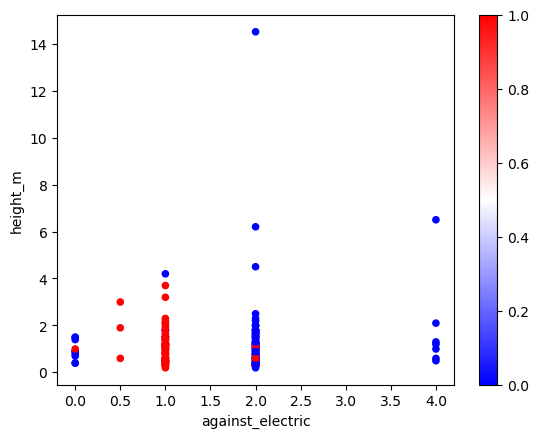

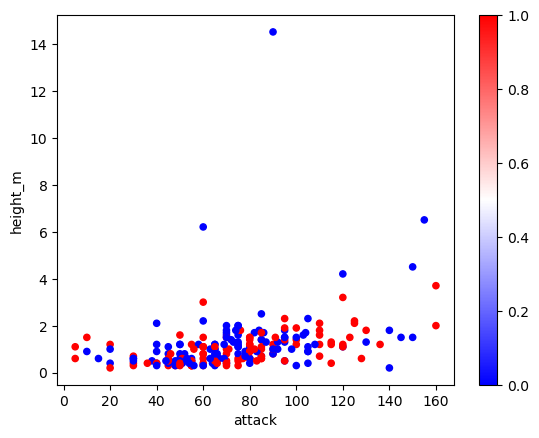

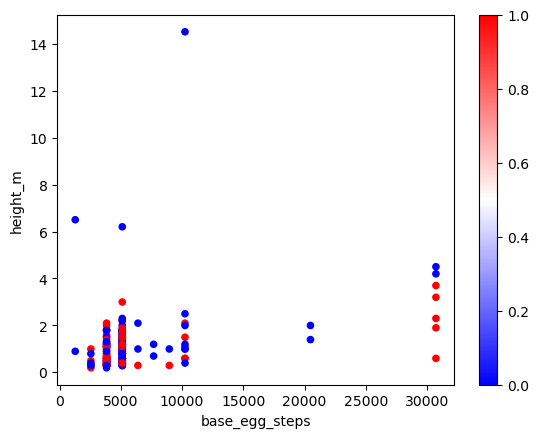

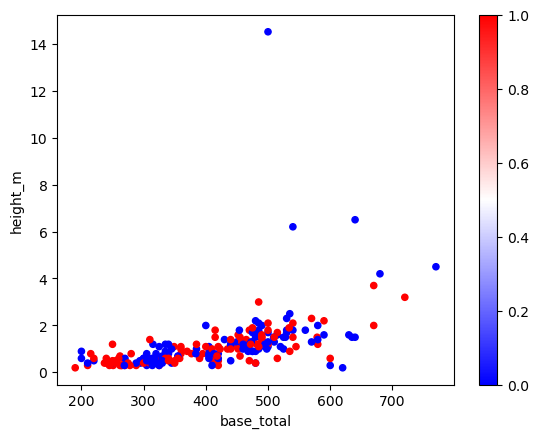

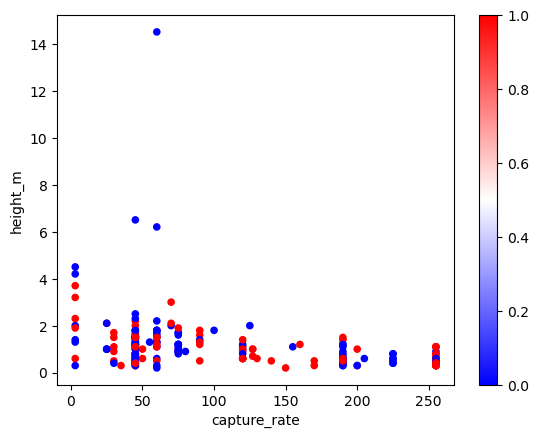

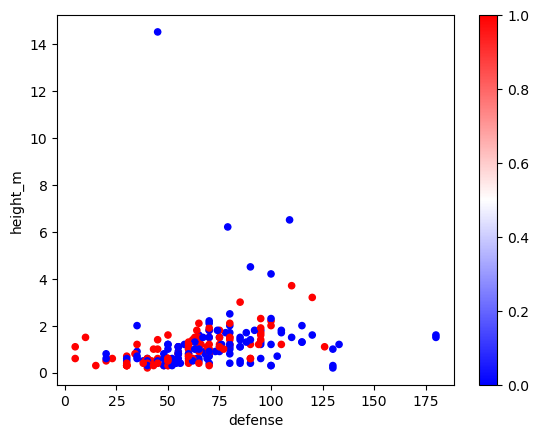

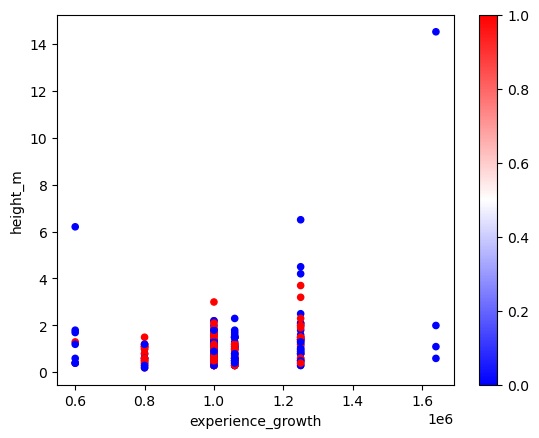

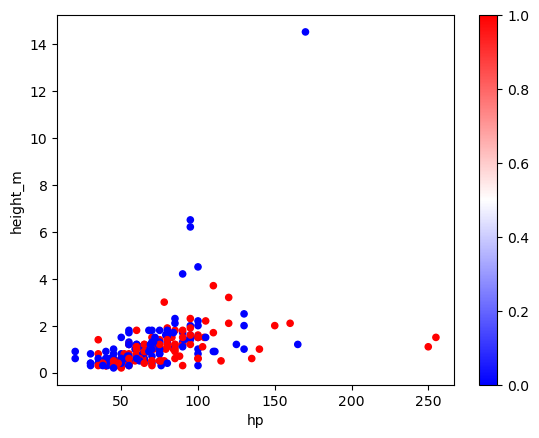

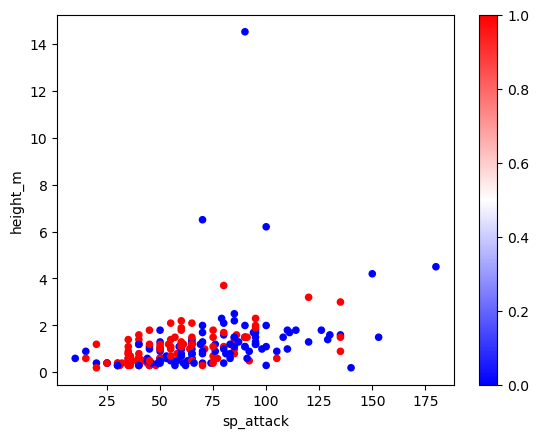

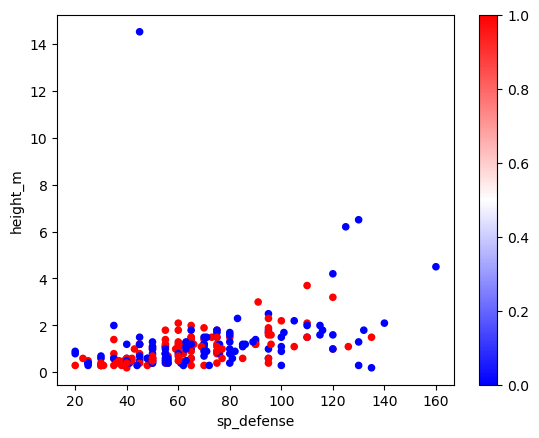

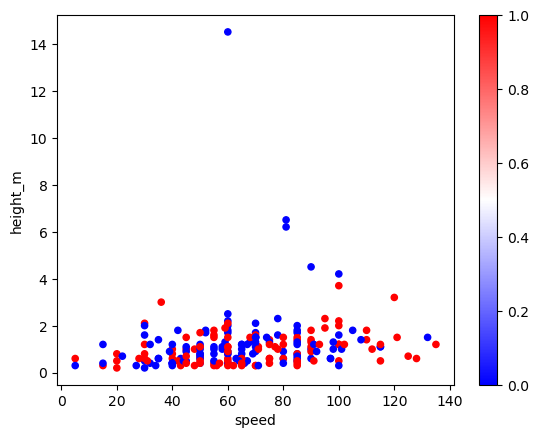

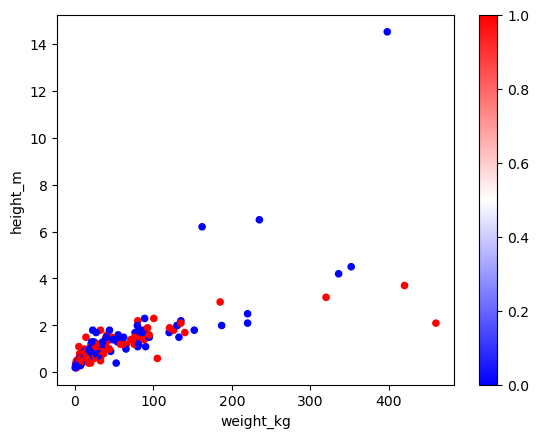

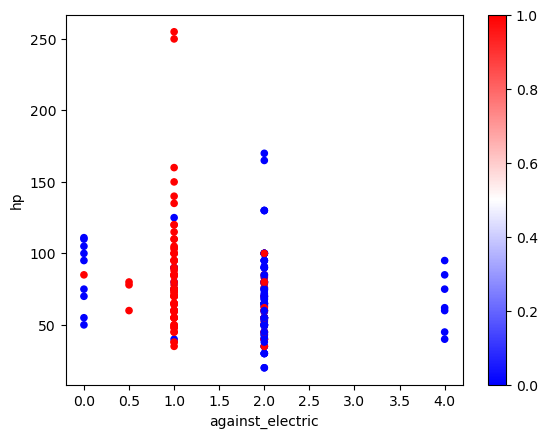

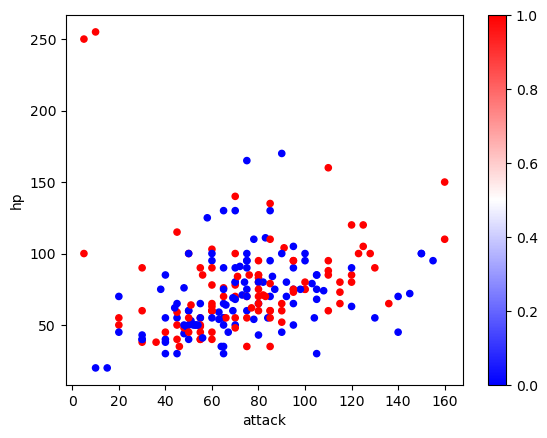

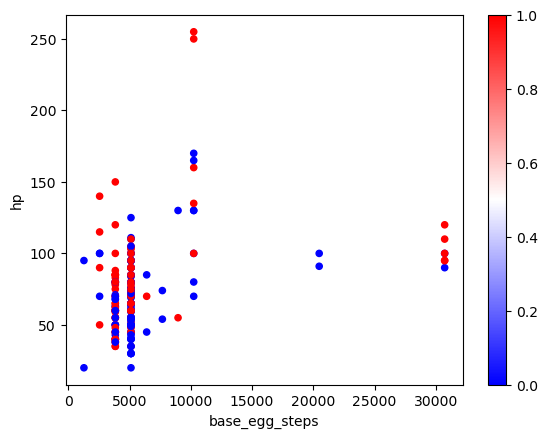

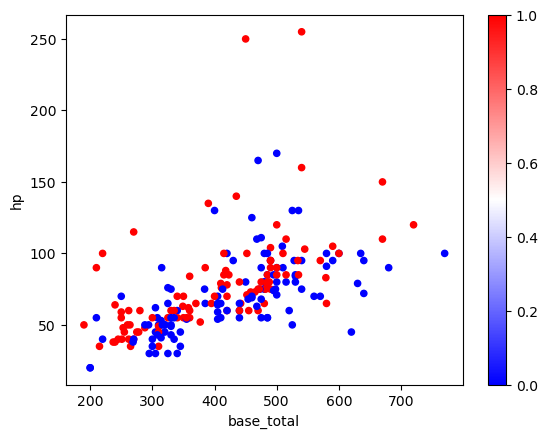

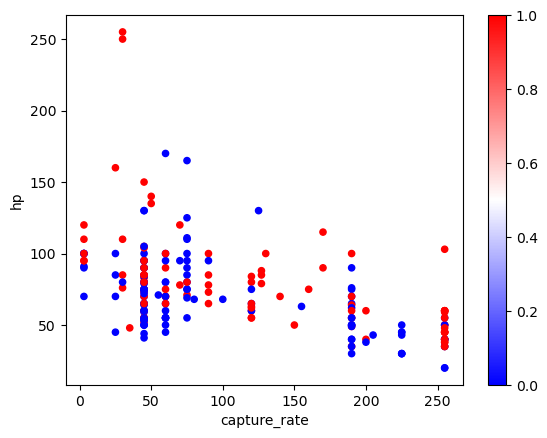

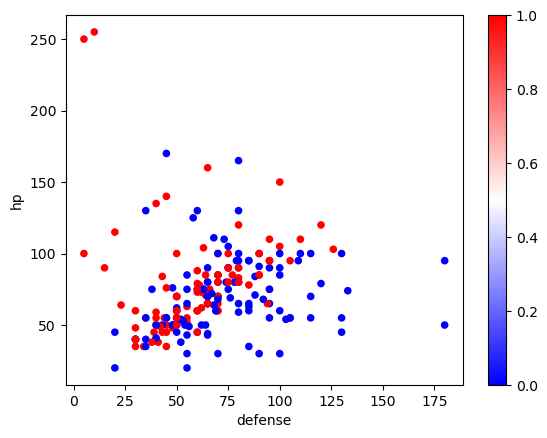

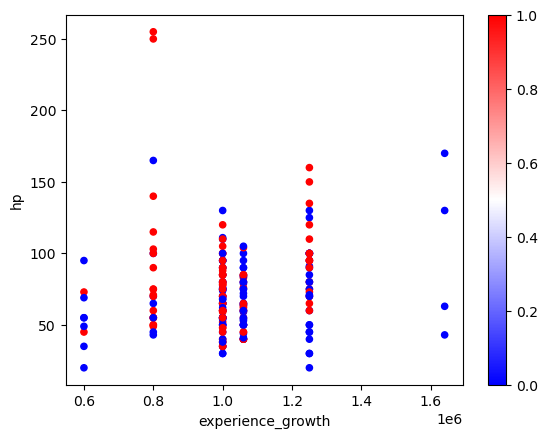

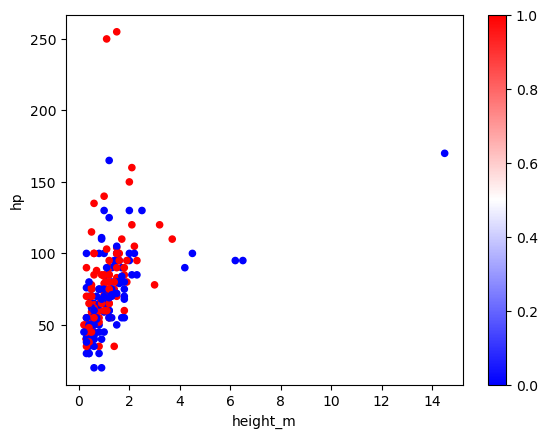

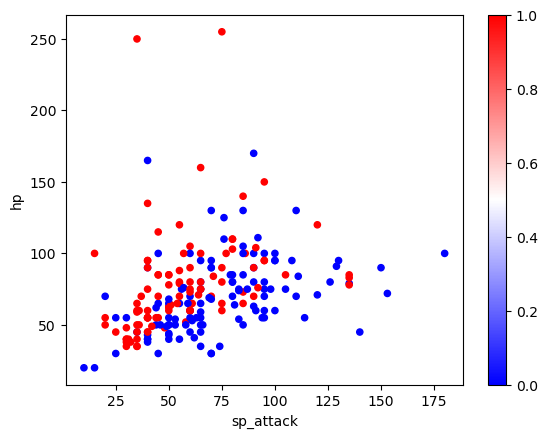

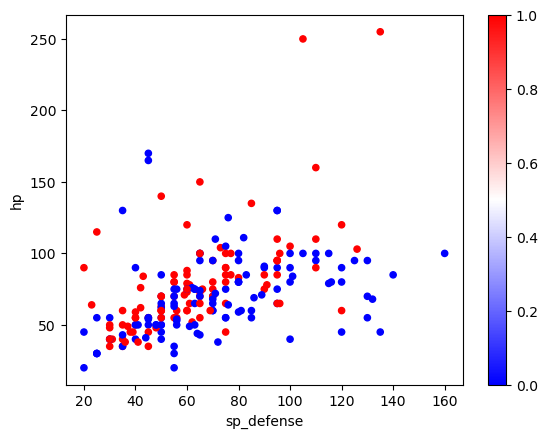

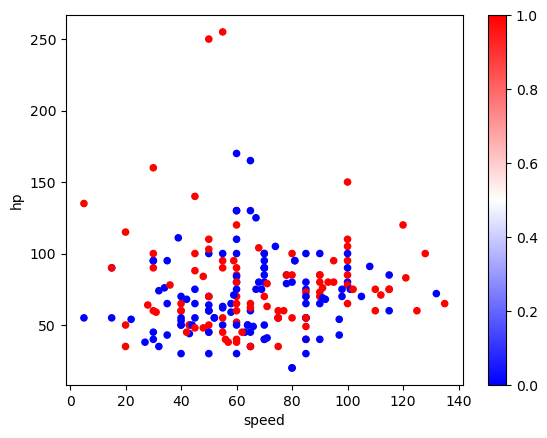

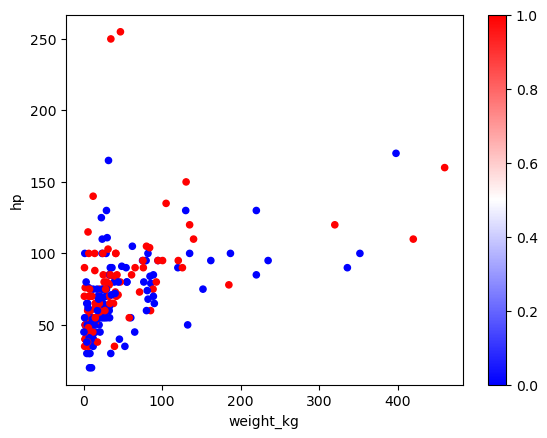

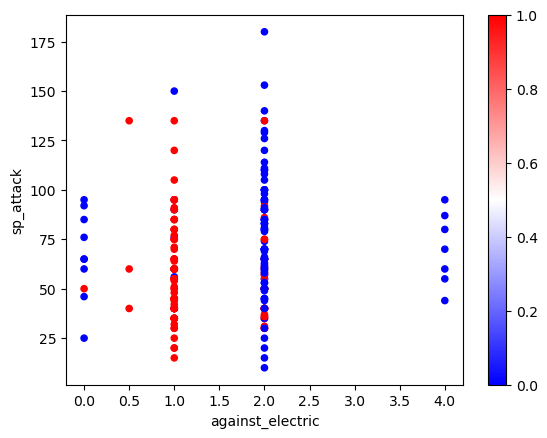

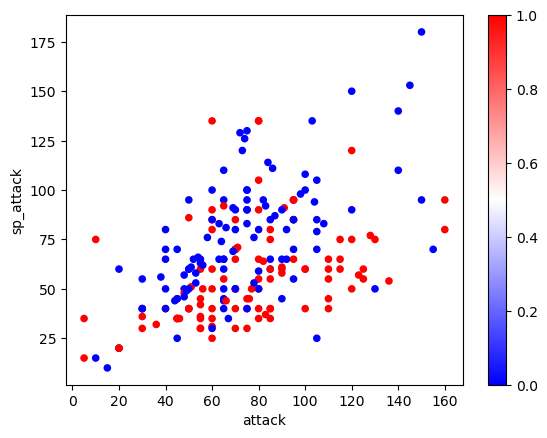

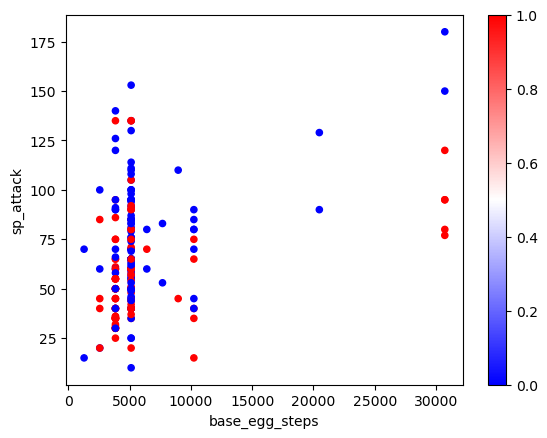

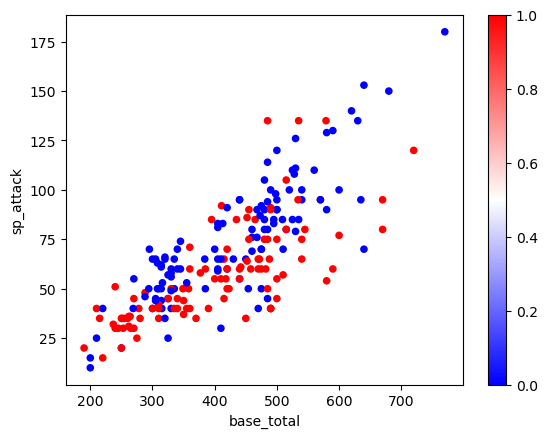

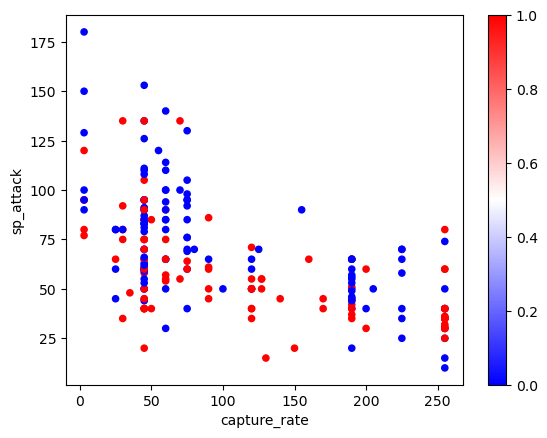

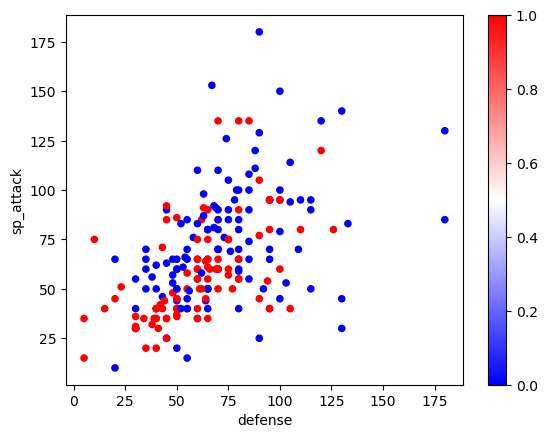

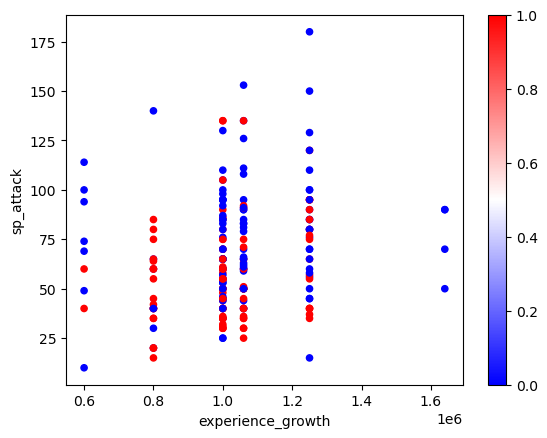

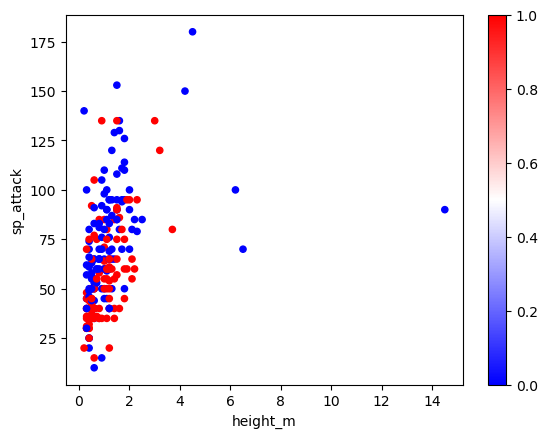

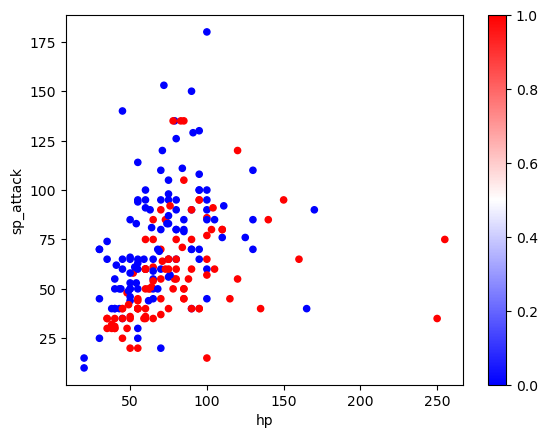

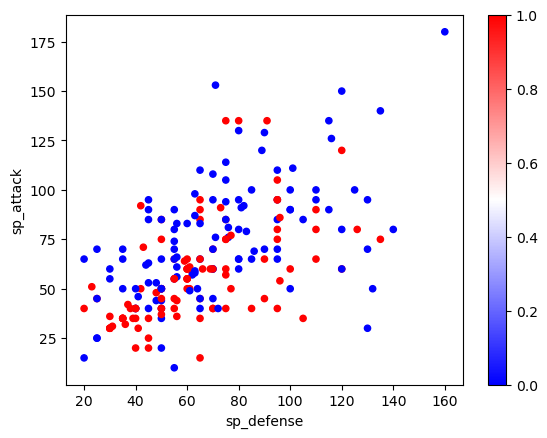

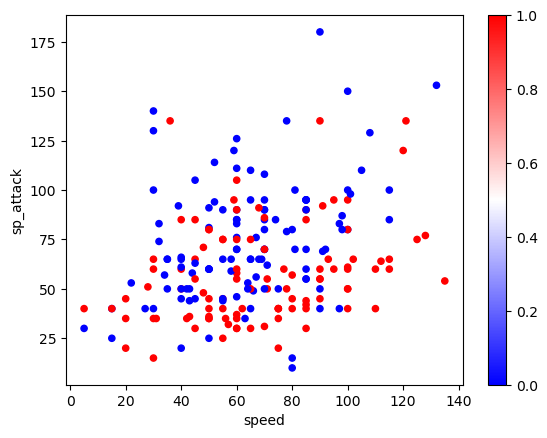

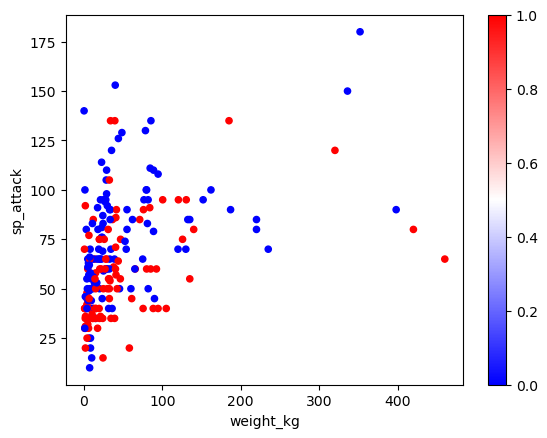

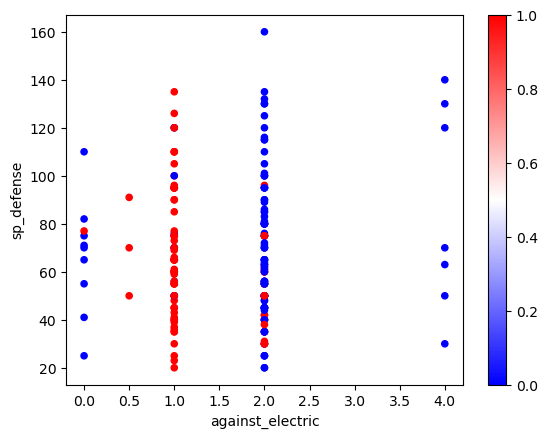

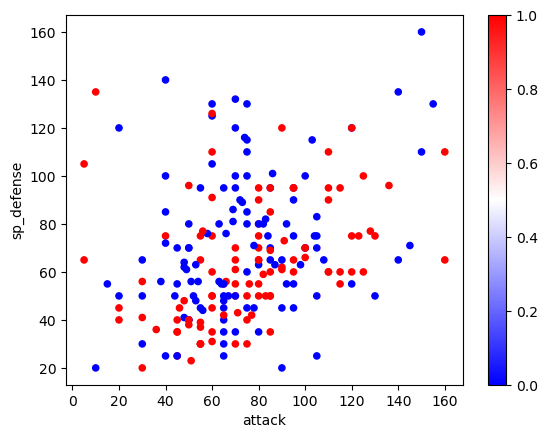

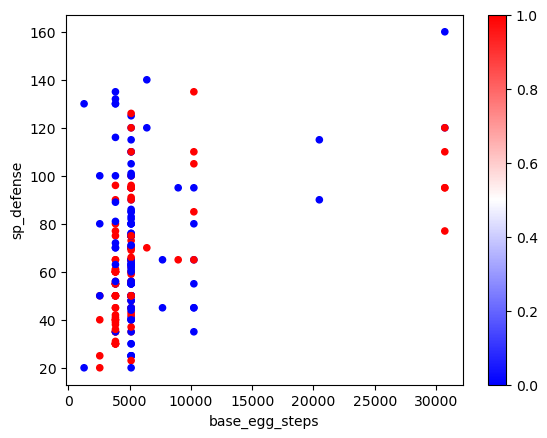

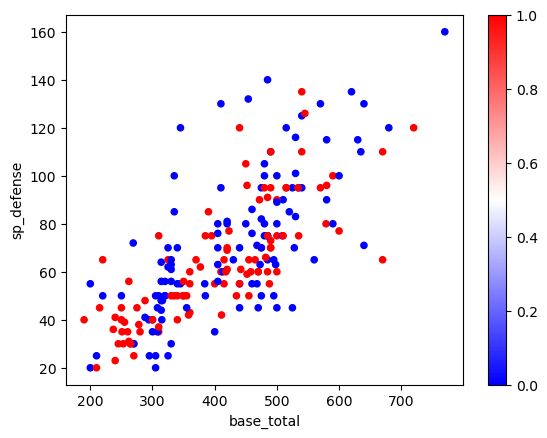

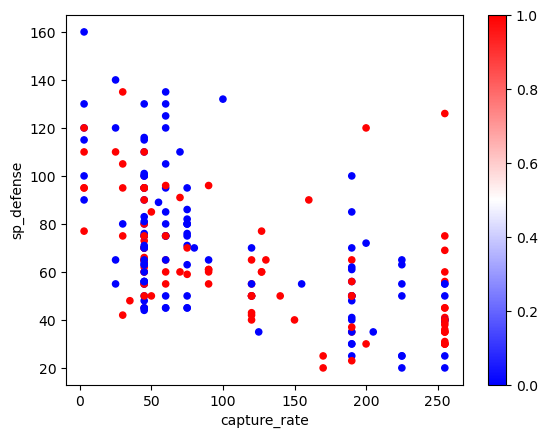

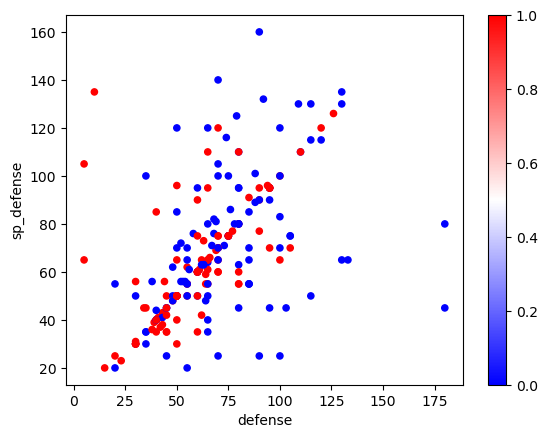

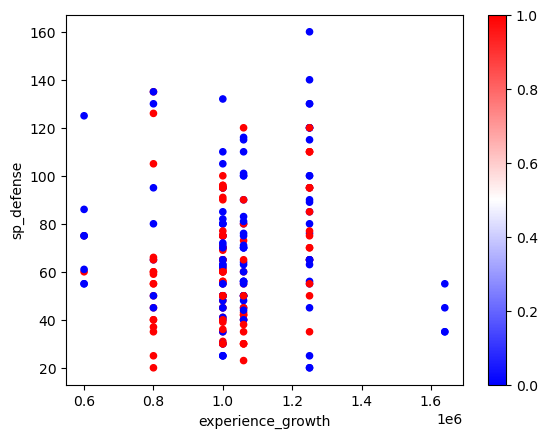

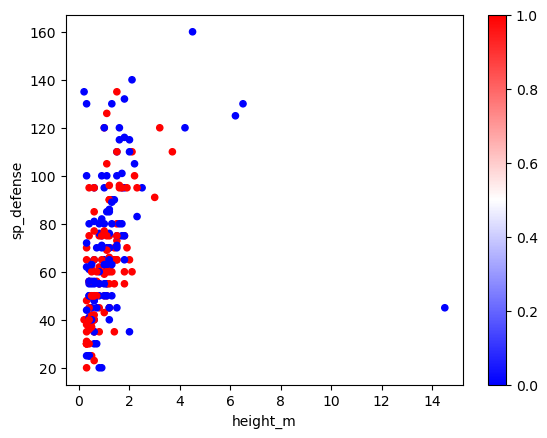

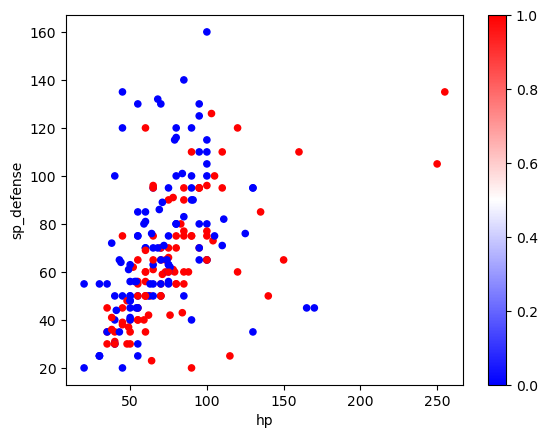

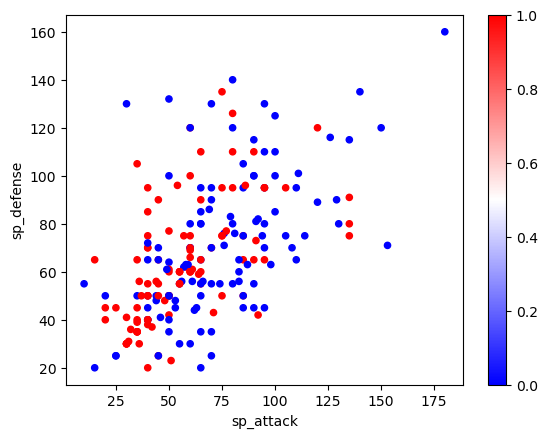

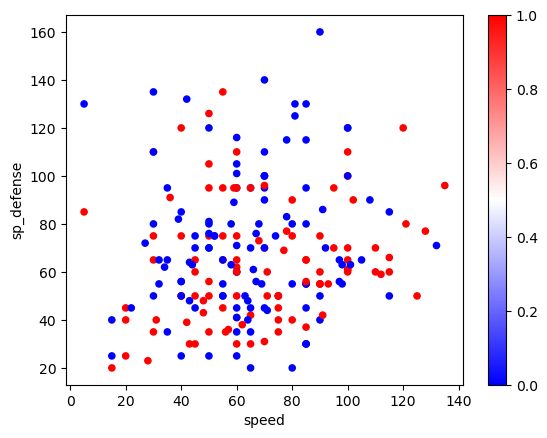

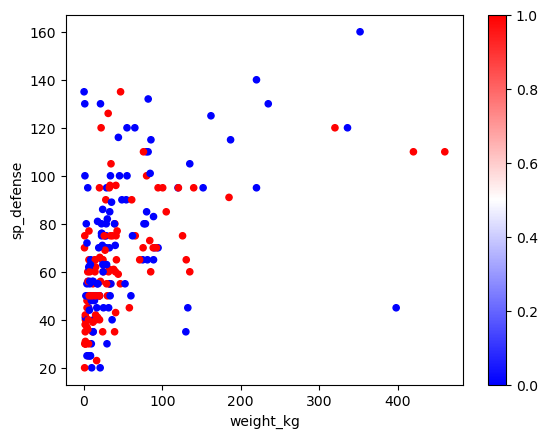

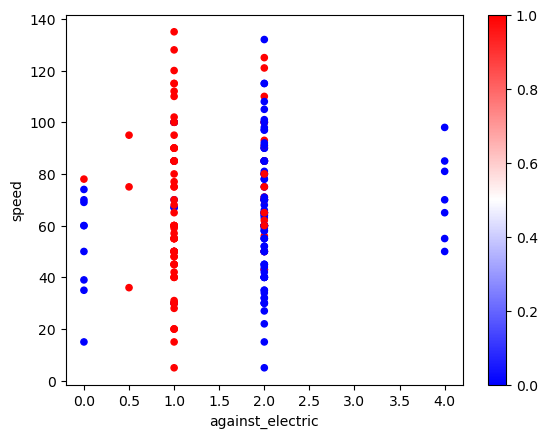

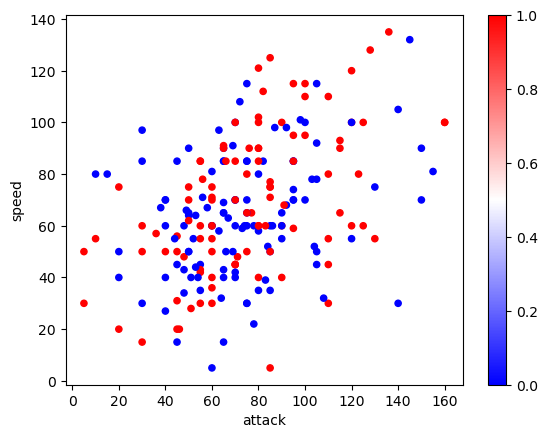

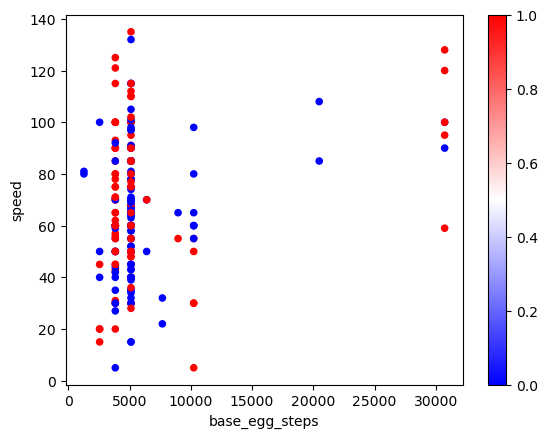

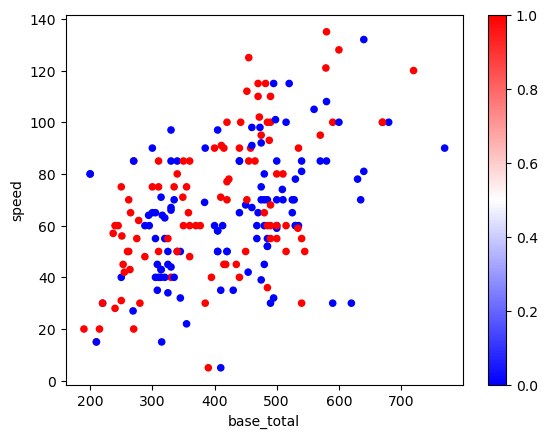

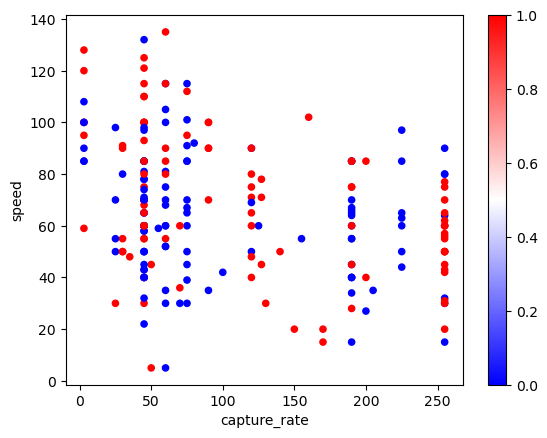

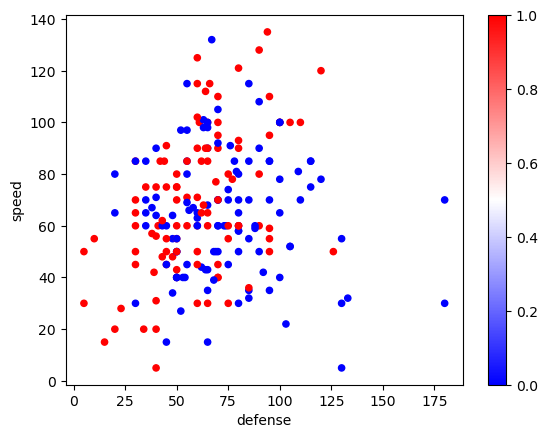

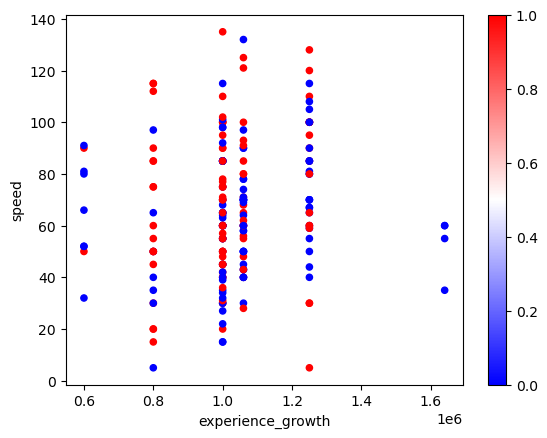

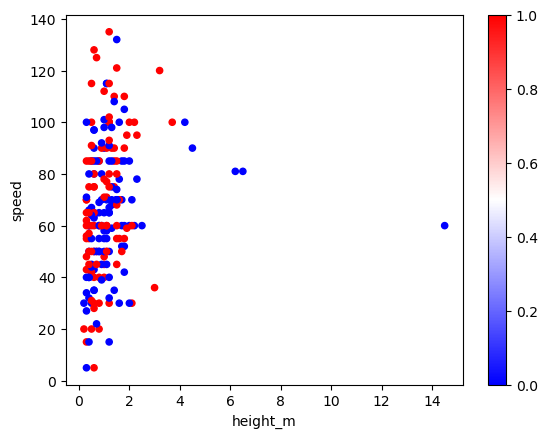

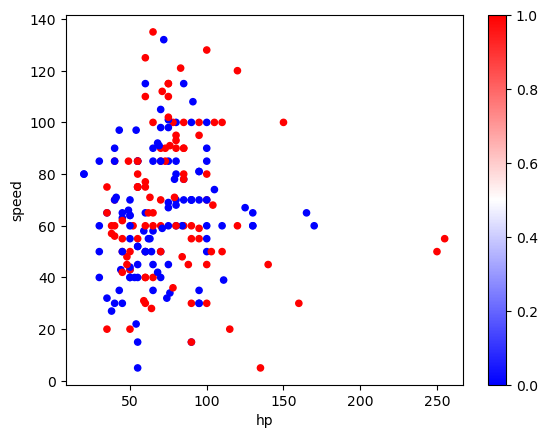

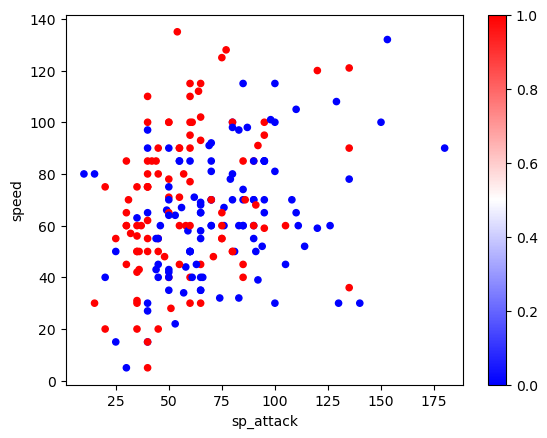

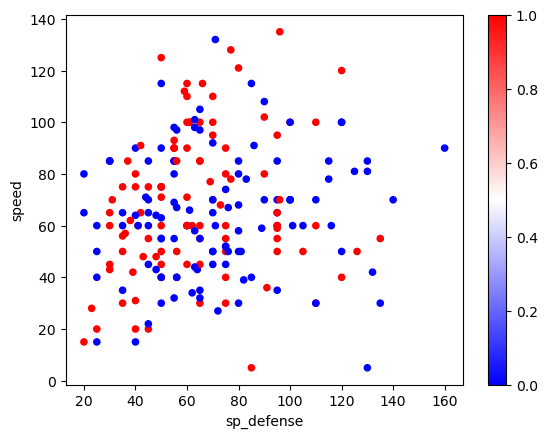

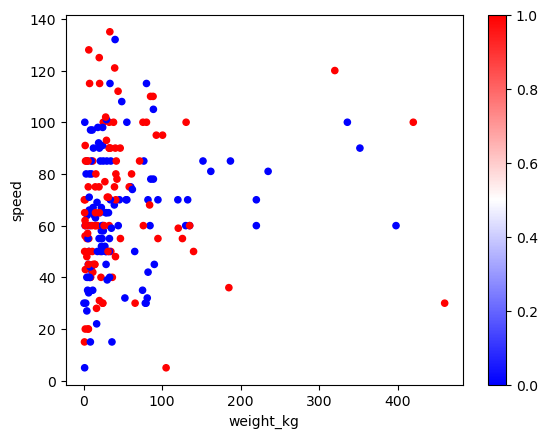

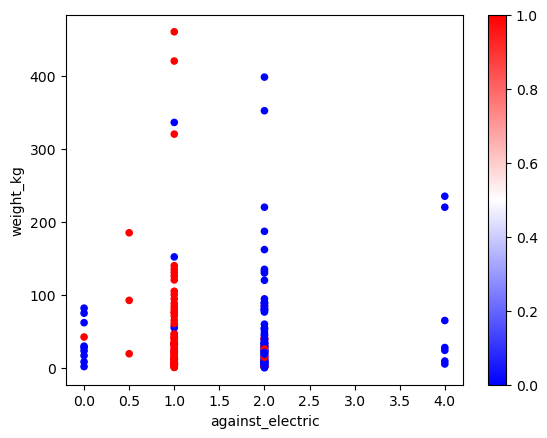

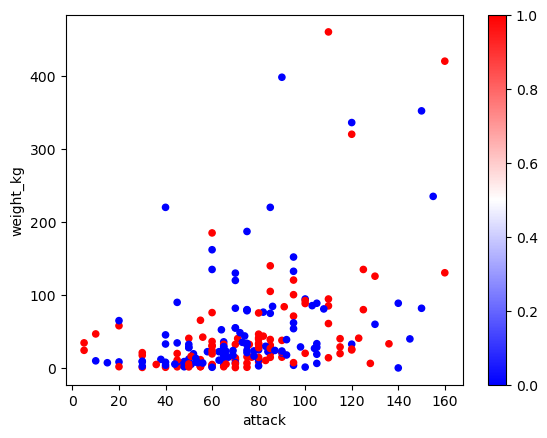

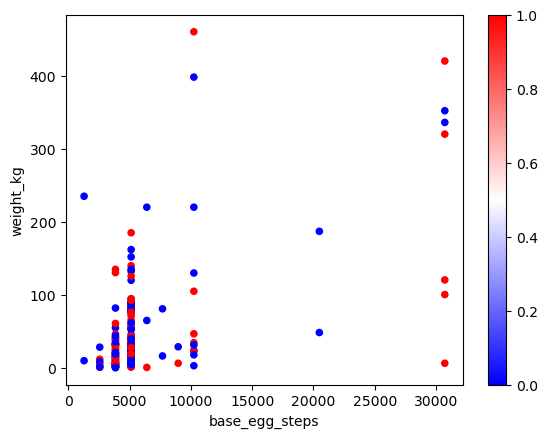

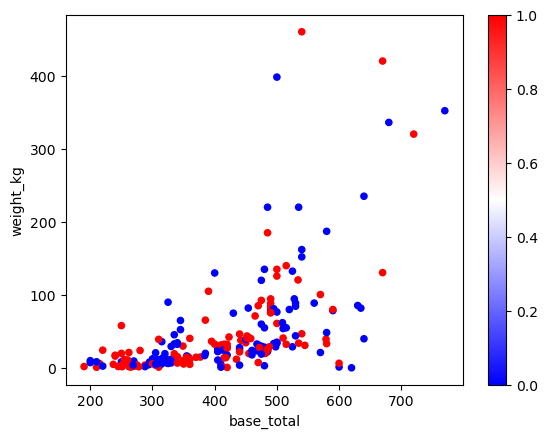

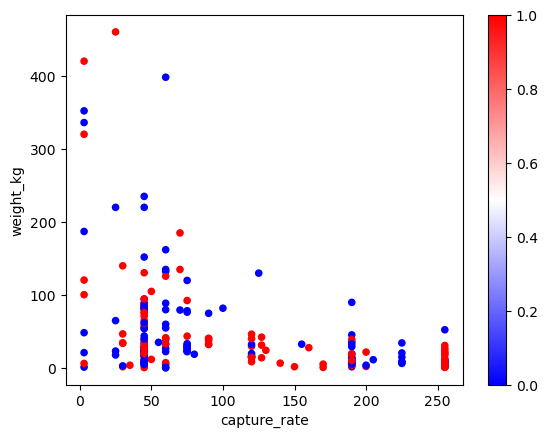

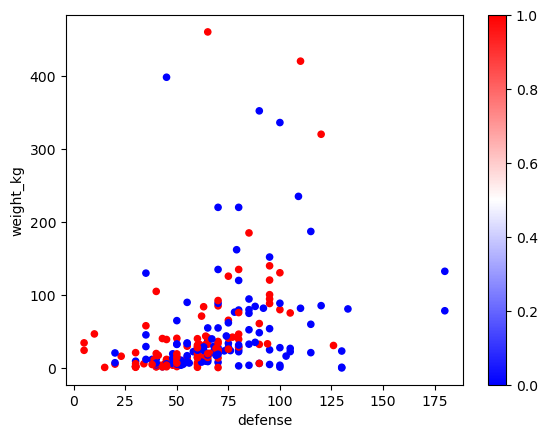

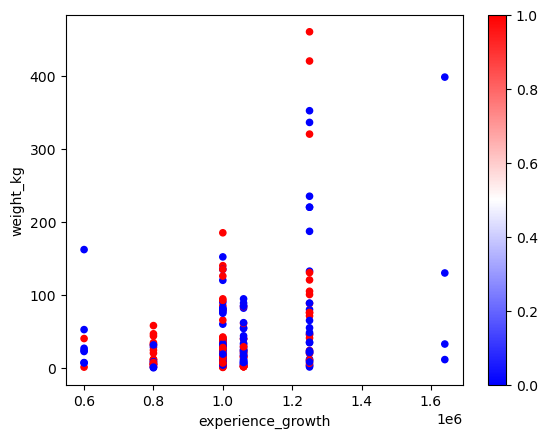

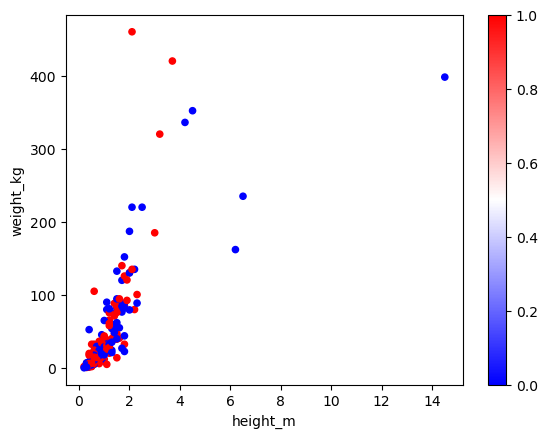

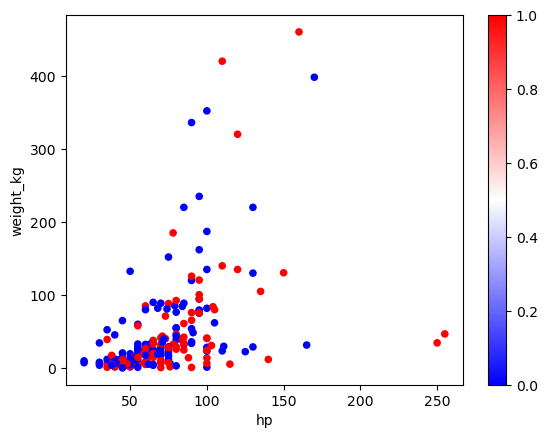

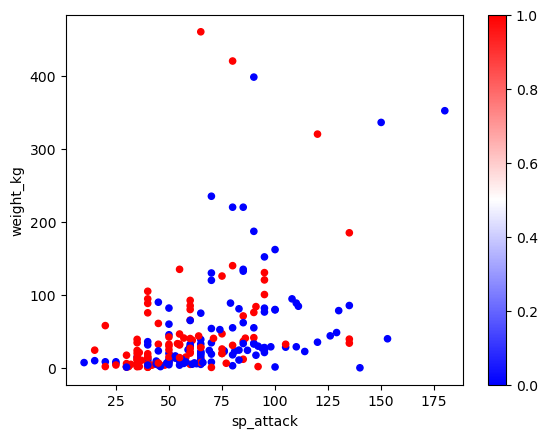

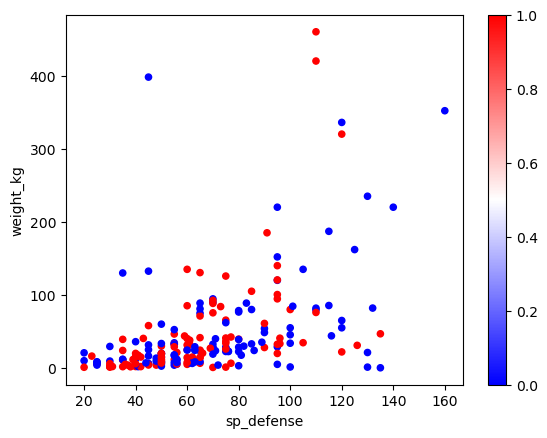

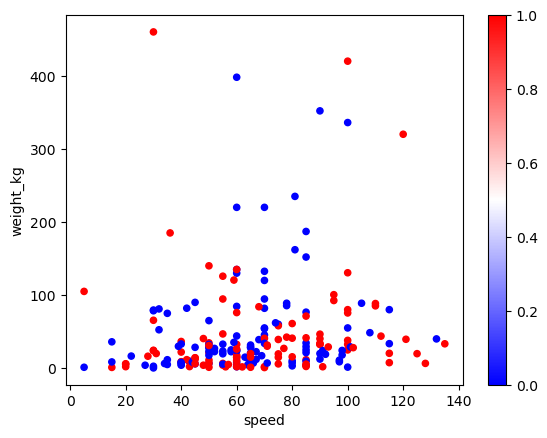

In [18]:
#display graphs 
for i, val in dados.items():
    for j, val in dados.items():
        if i != j and i != 'type1' and j != 'type1' and i != 'is_legendary' and j != 'is_legendary':
            ax2 = dados.plot.scatter(x=j,y=i,c=dados['type1'],colormap='bwr')

In [19]:
#Exclude legendary pokemons (considering them as outliers)
dados_no_lgdry = dados.copy()
for i, row in dados.iterrows():
    if dados.at[i,'is_legendary'] == 1:
        dados_no_lgdry = dados_no_lgdry.drop([i,i])

In [20]:
#Split type1 column 
type1 = dados['type1']
dados = dados.drop(columns='type1')

#Split 10% of the dataset for the final test
X, X_final_test, y, y_final_test = train_test_split(dados,type1, test_size=0.10, random_state=42)

#Split train and test sets (70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [21]:
#Split test and train without legendary pokemon
#Split type1 column 
type1_no_lgdry = dados_no_lgdry['type1']
dados_no_lgdry = dados_no_lgdry.drop(columns='type1')

#Split 10% of the dataset for the final test
X_no_lgdry, X_final_test_no_lgdry, y_no_lgdry, y_final_test_no_lgdry = train_test_split(dados_no_lgdry,type1_no_lgdry, test_size=0.10, random_state=42)

#Split train and test sets (70% for training and 30% for testing)
X_train_no_lgdry, X_test_no_lgdry, y_train_no_lgdry, y_test_no_lgdry = train_test_split(X_no_lgdry,y_no_lgdry, test_size=0.20, random_state=42)

In [22]:
#standardize data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_final_test = scaler.transform(X_final_test)

In [23]:
#standardize data without legendary pokemon
scaler = StandardScaler()
scaler.fit(X_train_no_lgdry)
X_train_no_lgdry = scaler.transform(X_train_no_lgdry)
X_test_no_lgdry = scaler.transform(X_test_no_lgdry)
X_final_test_no_lgdry = scaler.transform(X_final_test_no_lgdry)

In [24]:
#GridSearch for parameter optimization and k-cross validation (k=5)
#LOGISTIC REGRESSION
lr_parameters = {'C':[0.5, 1, 1.5]}

lr = LogisticRegression()
lr_gs = GridSearchCV(lr, lr_parameters)
lr_model = lr_gs.fit(X_train,np.array(y_train))
lrgs = GridSearchCV(estimator= LogisticRegression(), param_grid=lr_parameters)

y_hat_train_lr = lr_model.predict(X_train)
y_hat_test_lr = lr_model.predict(X_test)
#sorted(lr_gs.cv_results_.keys())
lr_gs.best_params_
#y_hat_train

{'C': 0.5}

In [25]:
#without legendary pokemon
#GridSearch for parameter optimization and k-cross validation (k=5)
#LOGISTIC REGRESSION
lr_parameters = {'C':[0.5, 1, 1.5]}

lr = LogisticRegression()
lr_gs_no_lgdry = GridSearchCV(lr, lr_parameters)
lr_model_no_lgdry = lr_gs_no_lgdry.fit(X_train_no_lgdry,np.array(y_train_no_lgdry))
lrgs_no_lgdry = GridSearchCV(estimator= LogisticRegression(), param_grid=lr_parameters)

y_hat_train_no_lgdry_lr = lr_model.predict(X_train_no_lgdry)
y_hat_test_no_lgdry_lr = lr_model.predict(X_test_no_lgdry)
#sorted(lr_gs.cv_results_.keys())
lr_gs.best_params_
#y_hat_train

{'C': 0.5}

In [26]:
accuracy_score(y_train_no_lgdry, y_hat_train_no_lgdry_lr)

0.777027027027027

In [27]:
accuracy_score(y_test_no_lgdry, y_hat_test_no_lgdry_lr)

0.8108108108108109

In [28]:
accuracy_score(y_train, y_hat_train_lr)

0.7857142857142857

In [29]:
accuracy_score(y_test, y_hat_test_lr)

0.8717948717948718

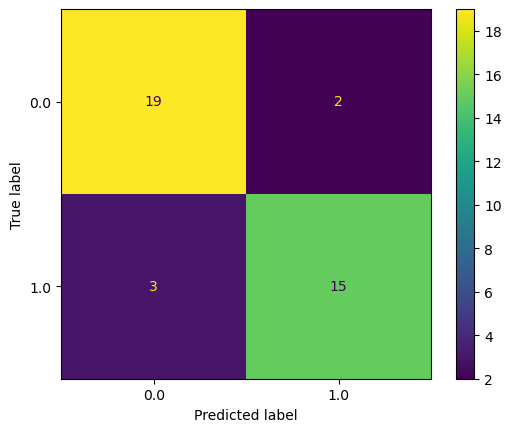

In [30]:
#confusion matrix for LR predicting the test dataset
cm = confusion_matrix(y_hat_test_lr, y_test, labels=lr_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_gs.classes_)
disp.plot()
plt.show()

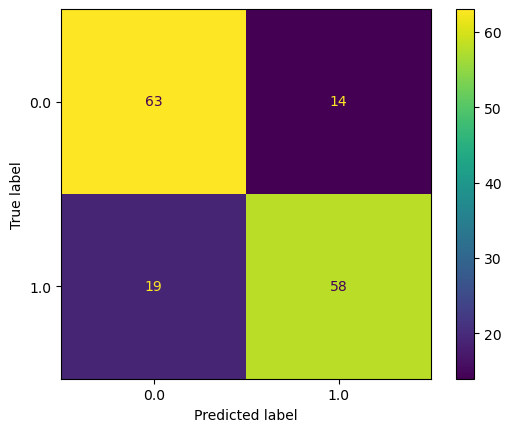

In [31]:
#confusion matrix for LR predicting the train dataset
cm = confusion_matrix(y_hat_train_lr, y_train, labels=lr_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_gs.classes_)
disp.plot()
plt.show()

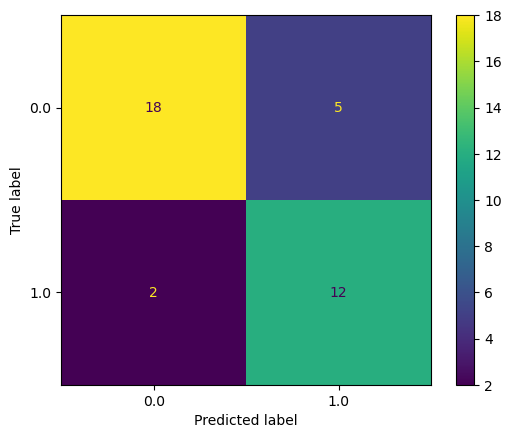

In [32]:
#confusion matrix for LR predicting the test dataset without legendary pokemon
cm = confusion_matrix(y_hat_test_no_lgdry_lr, y_test_no_lgdry, labels=lr_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_gs.classes_)
disp.plot()
plt.show()

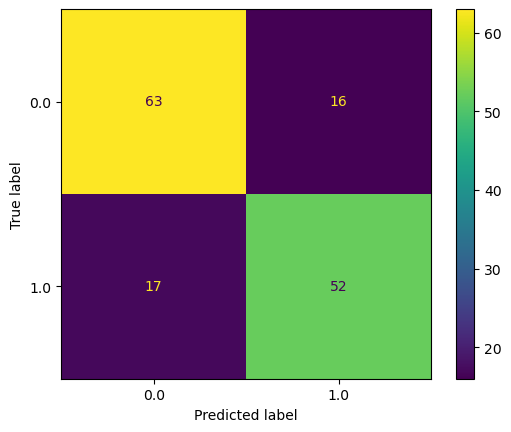

In [33]:
#confusion matrix for LR predicting the train dataset without legendary pokemon
cm = confusion_matrix(y_hat_train_no_lgdry_lr, y_train_no_lgdry, labels=lr_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr_gs.classes_)
disp.plot()
plt.show()

In [34]:
#GridSearch for parameter optimization and k-cross validation (k=5)
#SVM

svm_parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[0.5, 1, 5, 10], 'gamma':('scale', 'auto'),
                  'degree':[2, 3, 4, 5]}

SVM = svm.SVC()
svm_gs = GridSearchCV(SVM, svm_parameters)
svm_model = svm_gs.fit(X_train,np.array(y_train))
svmgs = GridSearchCV(estimator= LogisticRegression(), param_grid=svm_parameters)

y_hat_train_svm = svm_model.predict(X_train)
y_hat_test_svm = svm_model.predict(X_test)
#sorted(lr_gs.cv_results_.keys())
svm_gs.best_params_
#y_hat_train

{'C': 0.5, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [35]:
#without legendary pokemon
#GridSearch for parameter optimization and k-cross validation (k=5)
#SVM

svm_parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[0.5, 1, 5, 10], 'gamma':('scale', 'auto'),
                  'degree':[2, 3, 4, 5]}

SVM = svm.SVC()
svm_gs = GridSearchCV(SVM, svm_parameters)
svm_model_no_lgdry = svm_gs.fit(X_train_no_lgdry,np.array(y_train_no_lgdry))
svmgs = GridSearchCV(estimator= LogisticRegression(), param_grid=svm_parameters)

y_hat_train_no_lgdry_svm = svm_model.predict(X_train_no_lgdry)
y_hat_test_no_lgdry_svm = svm_model.predict(X_test_no_lgdry)
#sorted(lr_gs.cv_results_.keys())
svm_gs.best_params_
#y_hat_train

{'C': 0.5, 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid'}

In [36]:
accuracy_score(y_train_no_lgdry, y_hat_train_no_lgdry_svm)

0.777027027027027

In [37]:
accuracy_score(y_test_no_lgdry, y_hat_test_no_lgdry_svm)

0.7567567567567568

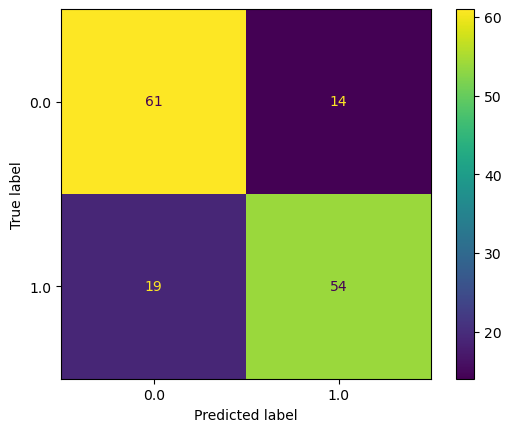

In [38]:
#confusion matrix for SVM predicting the train dataset without legendary pokemon

cm = confusion_matrix(y_hat_train_no_lgdry_svm, y_train_no_lgdry, labels=svm_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_gs.classes_)
disp.plot()
plt.show()

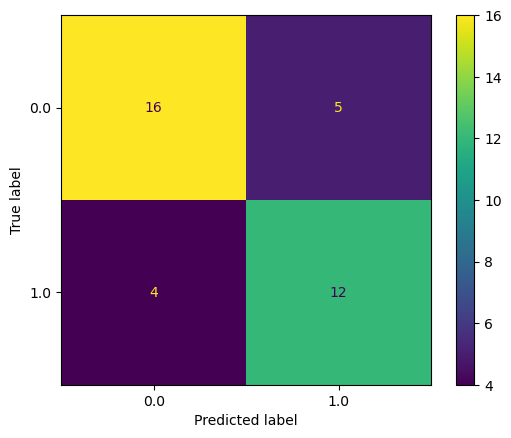

In [39]:
#confusion matrix for SVM predicting the test dataset without legendary pokemon

cm = confusion_matrix(y_hat_test_no_lgdry_svm, y_test_no_lgdry, labels=svm_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_gs.classes_)
disp.plot()
plt.show()

In [40]:
accuracy_score(y_train, y_hat_train_svm)

0.7987012987012987

In [41]:
accuracy_score(y_test, y_hat_test_svm)

0.8717948717948718

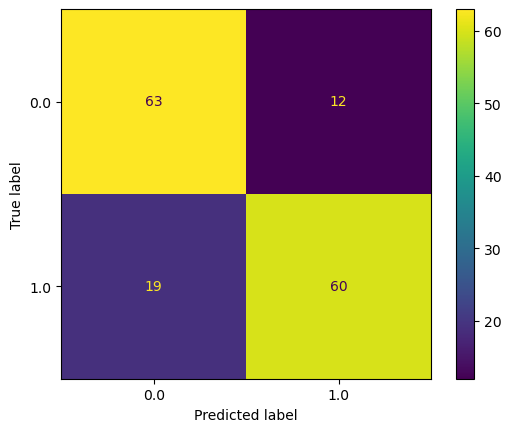

In [42]:
#confusion matrix for SVM predicting the train dataset

cm = confusion_matrix(y_hat_train_svm, y_train, labels=svm_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_gs.classes_)
disp.plot()
plt.show()

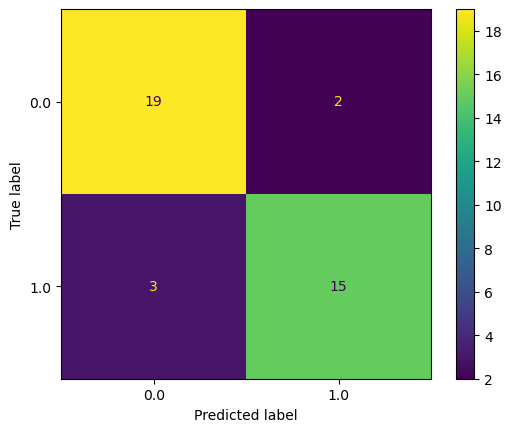

In [43]:
#confusion matrix for SVM predicting the test dataset

cm = confusion_matrix(y_hat_test_svm, y_test, labels=svm_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm_gs.classes_)
disp.plot()
plt.show()

In [50]:
#GridSearch for parameter optimization and k-cross validation (k=5)
#DECISION TREE

dt_parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), 
                 'max_depth':[10, 15, 18, 20, 30, 40, 50], 'min_samples_split':[2, 3, 4, 5]}


dt = DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, dt_parameters)
dt_model = dt_gs.fit(X_train,np.array(y_train))
dtgs = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=dt_parameters)

y_hat_train_dt = dt_model.predict(X_train)
y_hat_test_dt = dt_model.predict(X_test)
#sorted(lr_gs.cv_results_.keys())
dt_gs.best_params_
#y_hat_train

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_split': 5,
 'splitter': 'best'}

In [51]:
accuracy_score(y_train, y_hat_train_dt)

0.987012987012987

In [52]:
accuracy_score(y_test, y_hat_test_dt)

0.9230769230769231

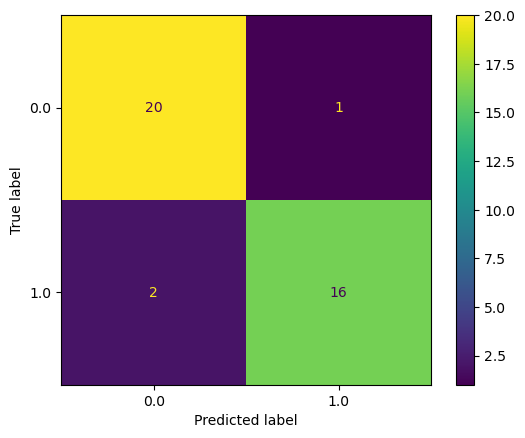

In [53]:
#confusion matrix for DT predicting the test dataset

cm = confusion_matrix(y_hat_test_dt, y_test, labels=dt_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_gs.classes_)
disp.plot()
plt.show()

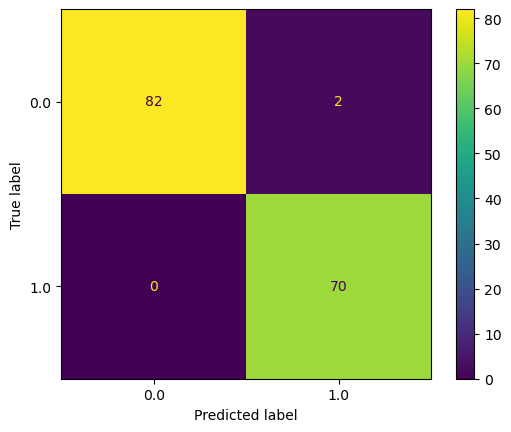

In [54]:
#confusion matrix for DT predicting the train dataset

cm = confusion_matrix(y_hat_train_dt, y_train, labels=dt_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_gs.classes_)
disp.plot()
plt.show()

In [55]:
#without legendary
#GridSearch for parameter optimization and k-cross validation (k=5)
#DECISION TREE

dt_parameters = {'criterion':('gini', 'entropy'), 'splitter':('best', 'random'), 
                 'max_depth':[10, 15, 18, 20, 30, 40, 50], 'min_samples_split':[2, 3, 4, 5]}


dt = DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, dt_parameters)
dt_model = dt_gs.fit(X_train_no_lgdry,np.array(y_train_no_lgdry))
dtgs = GridSearchCV(estimator= DecisionTreeClassifier(), param_grid=dt_parameters)

y_hat_train_no_lgdry_dt = dt_model.predict(X_train_no_lgdry)
y_hat_test_no_lgdry_dt = dt_model.predict(X_test_no_lgdry)
#sorted(lr_gs.cv_results_.keys())
dt_gs.best_params_
#y_hat_train

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_split': 2,
 'splitter': 'random'}

In [56]:
accuracy_score(y_train_no_lgdry, y_hat_train_no_lgdry_dt)

1.0

In [57]:
accuracy_score(y_test_no_lgdry, y_hat_test_no_lgdry_dt)

0.8108108108108109

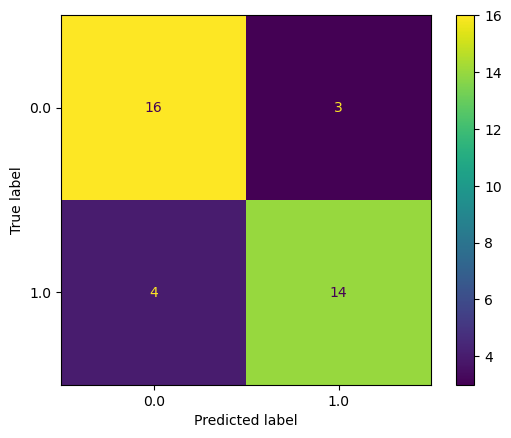

In [58]:
#confusion matrix for DT predicting the test dataset without legendary

cm = confusion_matrix(y_hat_test_no_lgdry_dt, y_test_no_lgdry, labels=dt_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_gs.classes_)
disp.plot()
plt.show()

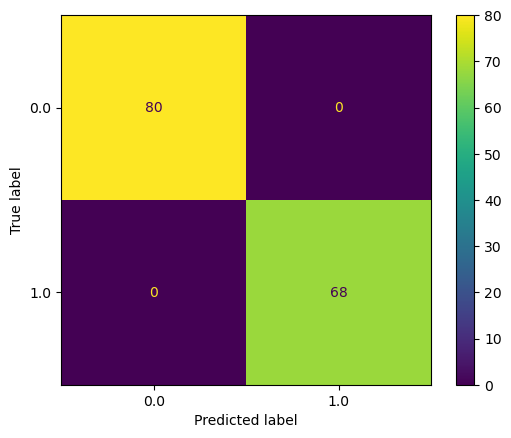

In [59]:
#confusion matrix for DT predicting the train dataset without legendary

cm = confusion_matrix(y_hat_train_no_lgdry_dt, y_train_no_lgdry, labels=dt_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt_gs.classes_)
disp.plot()
plt.show()

In [60]:
#GridSearch for parameter optimization and k-cross validation (k=5)
#RANDOM FOREST

rf_parameters = {'criterion':('gini', 'entropy'), 'n_estimators':[50, 100, 150, 200, 250, 300], 
                 'max_depth':[10, 15, 18, 20, 30, 40, 50], 'min_samples_split':[2, 3, 4, 5]}


rf = RandomForestClassifier()
rf_gs = GridSearchCV(rf, rf_parameters)
rf_model = rf_gs.fit(X_train,np.array(y_train))
rfgs = GridSearchCV(estimator= RandomForestClassifier(), param_grid=rf_parameters)

y_hat_train_rf = rf_model.predict(X_train)
y_hat_test_rf = rf_model.predict(X_test)
#sorted(lr_gs.cv_results_.keys())
rf_gs.best_params_
#y_hat_train

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 5,
 'n_estimators': 50}

In [61]:
accuracy_score(y_train, y_hat_train_rf)

0.9935064935064936

In [62]:
accuracy_score(y_test, y_hat_test_rf)

0.8974358974358975

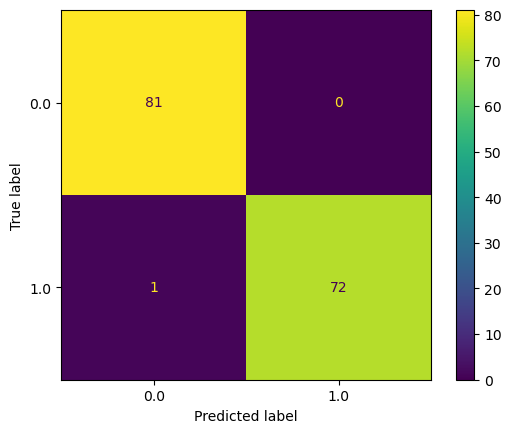

In [63]:
#confusion matrix for RF predicting the train dataset
cm = confusion_matrix(y_hat_train_rf, y_train, labels=rf_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_gs.classes_)
disp.plot()
plt.show()

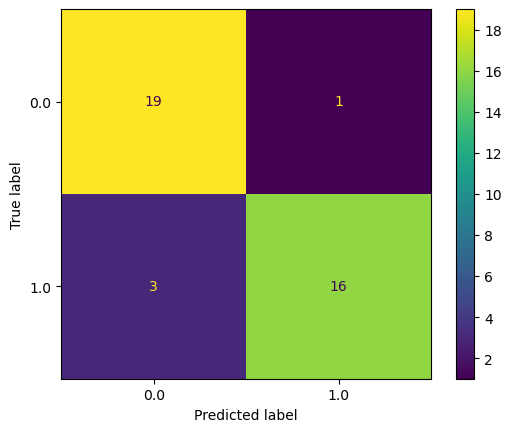

In [64]:
#confusion matrix for RF predicting the test dataset
cm = confusion_matrix(y_hat_test_rf, y_test, labels=rf_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_gs.classes_)
disp.plot()
plt.show()

In [65]:
#without legendary
#GridSearch for parameter optimization and k-cross validation (k=5)
#RANDOM FOREST

rf_parameters = {'criterion':('gini', 'entropy'), 'n_estimators':[50, 100, 150, 200, 250, 300], 
                 'max_depth':[10, 15, 18, 20, 30, 40, 50], 'min_samples_split':[2, 3, 4, 5]}


rf = RandomForestClassifier()
rf_gs = GridSearchCV(rf, rf_parameters)
rf_model = rf_gs.fit(X_train_no_lgdry,np.array(y_train_no_lgdry))
rfgs = GridSearchCV(estimator= RandomForestClassifier(), param_grid=rf_parameters)

y_hat_train_no_lgdry_rf = rf_model.predict(X_train_no_lgdry)
y_hat_test_no_lgdry_rf = rf_model.predict(X_test_no_lgdry)
#sorted(lr_gs.cv_results_.keys())
rf_gs.best_params_
#y_hat_train

{'criterion': 'entropy',
 'max_depth': 30,
 'min_samples_split': 2,
 'n_estimators': 50}

In [66]:
accuracy_score(y_train_no_lgdry, y_hat_train_no_lgdry_rf)

1.0

In [68]:
accuracy_score(y_test_no_lgdry, y_hat_test_no_lgdry_rf)

0.8108108108108109

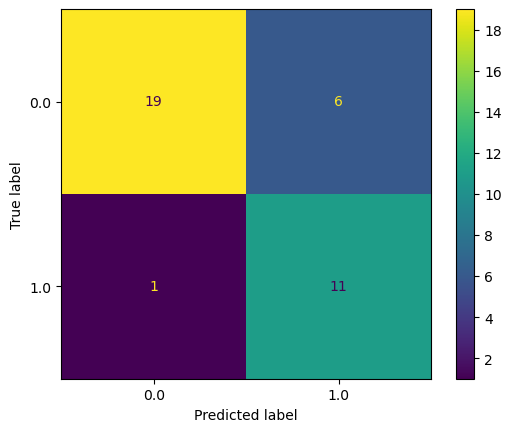

In [69]:
#confusion matrix for RF predicting the test dataset without legendary

cm = confusion_matrix(y_hat_test_no_lgdry_rf, y_test_no_lgdry, labels=rf_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_gs.classes_)
disp.plot()
plt.show()

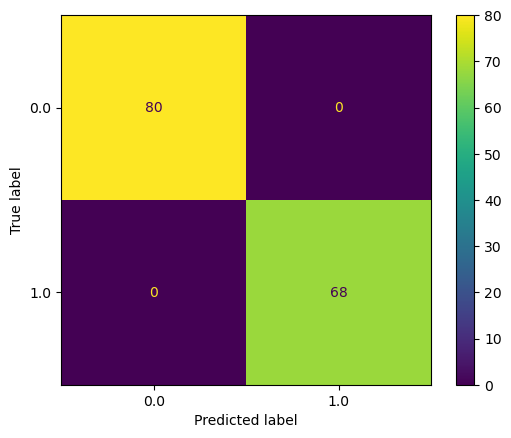

In [70]:
#confusion matrix for RF predicting the train dataset without legendary

cm = confusion_matrix(y_hat_train_no_lgdry_rf, y_train_no_lgdry, labels=rf_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_gs.classes_)
disp.plot()
plt.show()

In [73]:
#Final comparison between all models

#LR
y_hat_final_test_lr = lr_model.predict(X_final_test)
y_hat_final_test_no_lgdry_lr = lr_model.predict(X_final_test_no_lgdry)

#SVM
y_hat_final_test_svm = svm_model.predict(X_final_test)
y_hat_final_test_no_lgdry_svm = svm_model.predict(X_final_test_no_lgdry)

#DT
y_hat_final_test_dt = dt_model.predict(X_final_test)
y_hat_final_test_no_lgdry_dt = dt_model.predict(X_final_test_no_lgdry)

#RF
y_hat_final_test_rf = rf_model.predict(X_final_test)
y_hat_final_test_no_lgdry_rf = rf_model.predict(X_final_test_no_lgdry)



acc_lr = accuracy_score(y_final_test, y_hat_final_test_lr)
acc_lr_no_lgdry = accuracy_score(y_final_test_no_lgdry, y_hat_final_test_no_lgdry_lr)

acc_svm = accuracy_score(y_final_test, y_hat_final_test_svm)
acc_svm_no_lgdry = accuracy_score(y_final_test_no_lgdry, y_hat_final_test_no_lgdry_svm)

acc_dt = accuracy_score(y_final_test, y_hat_final_test_dt)
acc_dt_no_lgdry = accuracy_score(y_final_test_no_lgdry, y_hat_final_test_no_lgdry_dt)

acc_rf = accuracy_score(y_final_test, y_hat_final_test_rf)
acc_rf_no_lgdry = accuracy_score(y_final_test_no_lgdry, y_hat_final_test_no_lgdry_rf)


print('final accuracy:\n\nLR:',acc_lr,
      '\nLR (no legendary):',acc_lr_no_lgdry,
      '\n\nSVM:',acc_svm,
      '\nSVM (no legendary):',acc_svm_no_lgdry,
      '\n\nDT:',acc_dt,
      '\nDT (no legendary):',acc_dt_no_lgdry,
      '\n\nRF:',acc_rf,
      '\nRF (no legendary):',acc_rf_no_lgdry)

final accuracy:

LR: 0.7727272727272727 
LR (no legendary): 0.8095238095238095 

SVM: 0.7727272727272727 
SVM (no legendary): 0.8571428571428571 

DT: 0.8636363636363636 
DT (no legendary): 0.8095238095238095 

RF: 0.9090909090909091 
RF (no legendary): 0.8095238095238095
